# import modules

In [20]:
import glob, sys

sys.path.insert(0, "../")
from modules.contours_ver2 import *
from modules.contour_multimodality import *
from modules.plot_utils import *

# super contour data

In [21]:
filepath = "../data/TACC_sys2_super_contour_mcz30_2024-08-03.pkl"
with open(filepath, "rb") as f:
    data = pickle.load(f)

data = get_super_contour_stats(data, thres_factor=1.01, thres_diff=0)
print(data.keys())
print(data[0.02].keys())

dict_keys([0.02, 0.021282, 0.022564, 0.023846, 'td_arr', 'I_arr', 'source_params', 'template_params', 0.066154, 0.067436, 0.068718, 0.07, 0.061026, 0.062308, 0.06359, 0.064872, 0.050769, 0.052051, 0.053333, 0.054615, 0.035385, 0.036667, 0.037949, 0.039231, 0.045641, 0.046923, 0.048205, 0.049487, 0.055897, 0.057179, 0.058462, 0.059744, 0.025128, 0.02641, 0.027692, 0.028974, 0.030256, 0.031538, 0.032821, 0.034103, 0.040513, 0.041795, 0.043077, 0.044359])
dict_keys([0.1, 0.120513, 0.141026, 0.161538, 0.182051, 0.202564, 0.223077, 0.24359, 0.264103, 0.284615, 0.305128, 0.325641, 0.346154, 0.366667, 0.387179, 0.407692, 0.428205, 0.448718, 0.469231, 0.489744, 0.510256, 0.530769, 0.551282, 0.571795, 0.592308, 0.612821, 0.633333, 0.653846, 0.674359, 0.694872, 0.715385, 0.735897, 0.75641, 0.776923, 0.797436, 0.817949, 0.838462, 0.858974, 0.879487, 0.9, 'td', 'I_arr', 'y_arr', 'MLz_arr'])


In [22]:
with open("../data/sys2_super_contour_L_NP_mcz30_2024-08-05_12-12-55.pkl", "rb") as f:
    data_NP_L = pickle.load(f)

data_NP_L.keys()

dict_keys([0.02, 0.021282, 0.022564, 0.023846, 0.025128, 0.02641, 0.027692, 0.028974, 0.030256, 0.031538, 0.032821, 0.034103, 0.035385, 0.036667, 0.037949, 0.039231, 0.040513, 0.041795, 0.043077, 0.044359, 0.045641, 0.046923, 0.048205, 0.049487, 0.050769, 0.052051, 0.053333, 0.054615, 0.055897, 0.057179, 0.058462, 0.059744, 0.061026, 0.062308, 0.06359, 0.064872, 0.066154, 0.067436, 0.068718, 0.07, 'td_arr', 'I_arr', 'source_params', 'template_params'])

# super contours

In [23]:
td_arr = np.sort(np.array([td for td in data.keys() if isinstance(td, float)]))
# mask = np.logical_and(td_arr >= 0.02, td_arr <= 0.06)
# td_arr = td_arr[mask]
I_arr = np.round(data["I_arr"], 6)
src_params = data["source_params"]
X, Y = np.meshgrid(td_arr, I_arr)

theta_S = 0.785, phi_S = 0, theta_J = 1.57, phi_J = 1.57, mcz = 30 solar masses


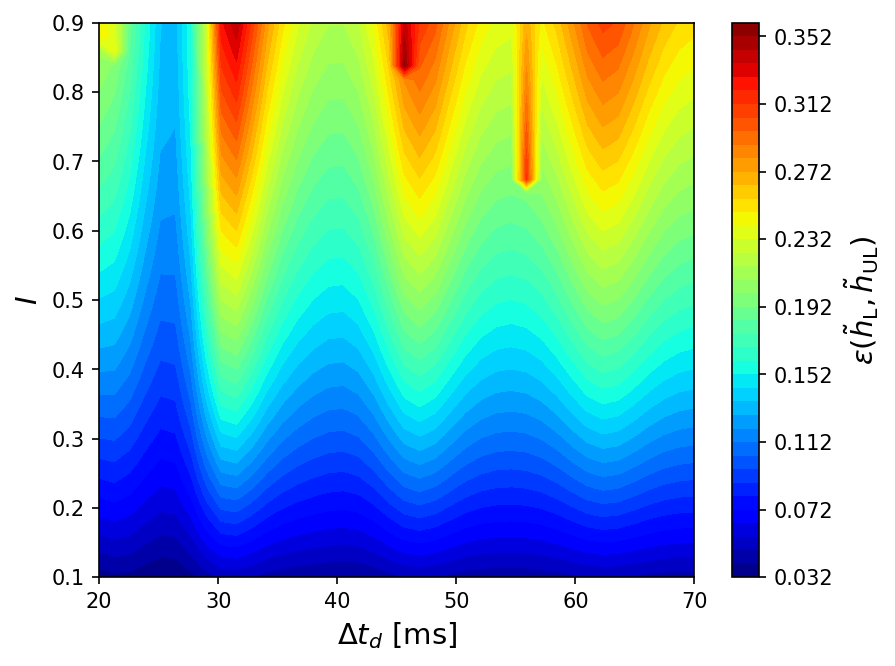

In [24]:
ep_NP_L_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_NP_L_mtx[r, c] = data_NP_L[td][I]["contour"]["epsilon"]

plt.contourf(X * 1e3, Y, ep_NP_L_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\epsilon (\~h_{\rm L}, \~h_{\rm UL})$", size=14
)
print(
    "theta_S = {:.3g}, phi_S = {:.3g}, theta_J = {:.3g}, phi_J = {:.3g}, mcz = {:.3g} solar masses".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        src_params["mcz"] / solar_mass,
    )
)

theta_S = 0.785, phi_S = 0, theta_J = 1.57, phi_J = 1.57, mcz = 30 solar masses


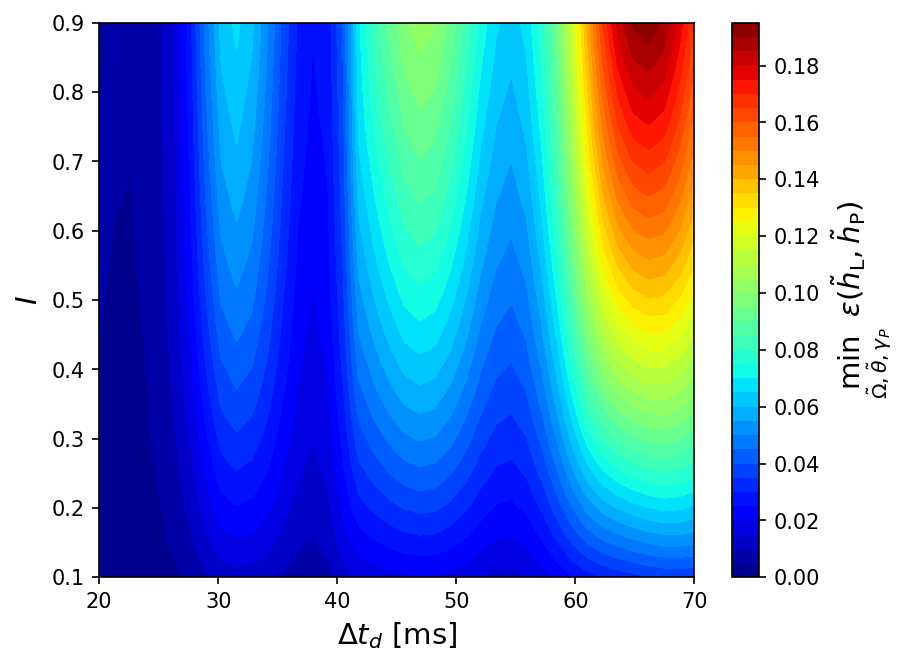

In [25]:
ep_min_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_min_mtx[r, c] = data[td][I]["stats"]["ep_min"]

plt.contourf(X * 1e3, Y, ep_min_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\~\Omega, \~\theta, \gamma_P}$ $\epsilon (\~h_{\rm L}, \~h_{\rm P})$",
    size=14,
)
print(
    "theta_S = {:.3g}, phi_S = {:.3g}, theta_J = {:.3g}, phi_J = {:.3g}, mcz = {:.3g} solar masses".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        src_params["mcz"] / solar_mass,
    )
)

theta_S = 0.785, phi_S = 0, theta_J = 1.57, phi_J = 1.57, mcz = 30 solar masses


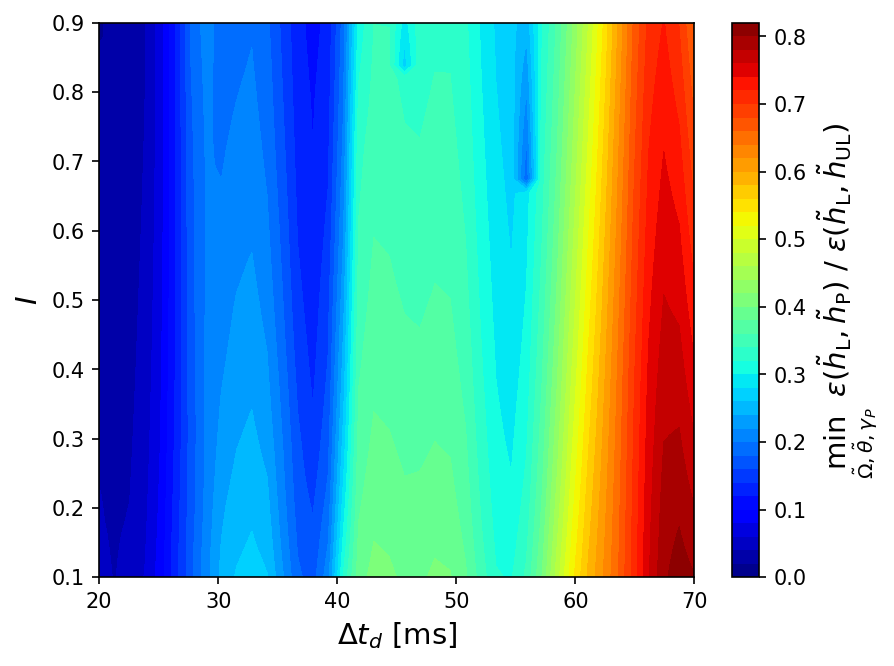

In [26]:
# create a contour that shows the ratio between the two above
ep_ratio_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_ratio_mtx[r, c] = ep_min_mtx[r, c] / ep_NP_L_mtx[r, c]

plt.contourf(X * 1e3, Y, ep_ratio_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\~\Omega, \~\theta, \gamma_P}$ $\epsilon (\~h_{\rm L}, \~h_{\rm P})$ / $\epsilon (\~h_{\rm L}, \~h_{\rm UL})$",
    size=14,
)
print(
    "theta_S = {:.3g}, phi_S = {:.3g}, theta_J = {:.3g}, phi_J = {:.3g}, mcz = {:.3g} solar masses".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        src_params["mcz"] / solar_mass,
    )
)

theta_S = 0.785, phi_S = 0, theta_J = 1.57, phi_J = 1.57, mcz = 30 solar masses


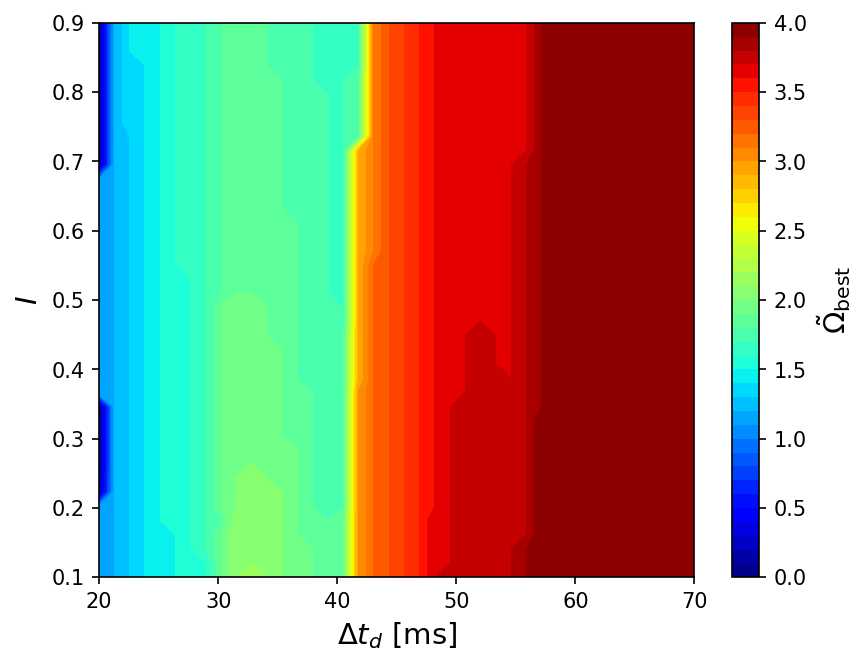

In [27]:
best_omega_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        best_omega_mtx[r, c] = data[td][I]["stats"]["ep_min_omega_tilde"]

plt.contourf(X * 1e3, Y, best_omega_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\~{\Omega}_{\rm best}$", size=14
)
print(
    "theta_S = {:.3g}, phi_S = {:.3g}, theta_J = {:.3g}, phi_J = {:.3g}, mcz = {:.3g} solar masses".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        src_params["mcz"] / solar_mass,
    )
)

theta_S = 0.785, phi_S = 0, theta_J = 1.57, phi_J = 1.57, mcz = 30 solar masses


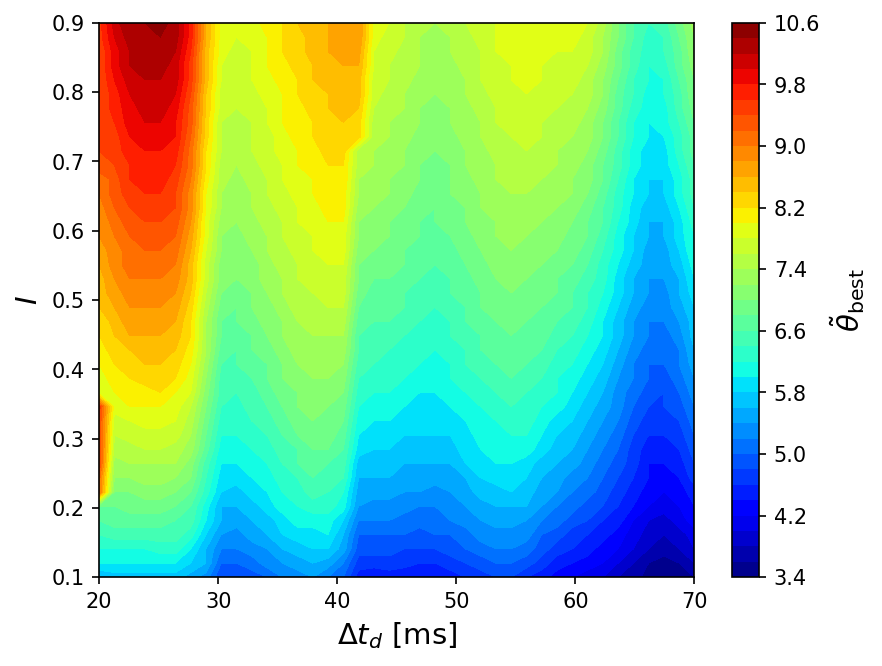

In [28]:
best_theta_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        best_theta_mtx[r, c] = data[td][I]["stats"]["ep_min_theta_tilde"]

plt.contourf(X * 1e3, Y, best_theta_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\~{\theta}_{\rm best}$", size=14
)
print(
    "theta_S = {:.3g}, phi_S = {:.3g}, theta_J = {:.3g}, phi_J = {:.3g}, mcz = {:.3g} solar masses".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        src_params["mcz"] / solar_mass,
    )
)

# plot individual contours

SelectionSlider(description='td:', index=39, options=(0.02, 0.021282, 0.022564, 0.023846, 0.025128, 0.02641, 0…

SelectionSlider(description='I:', index=30, options=(0.1, 0.120513, 0.141026, 0.161538, 0.182051, 0.202564, 0.…

minima: [0.14922743], omega: [4.], theta: [6.7]


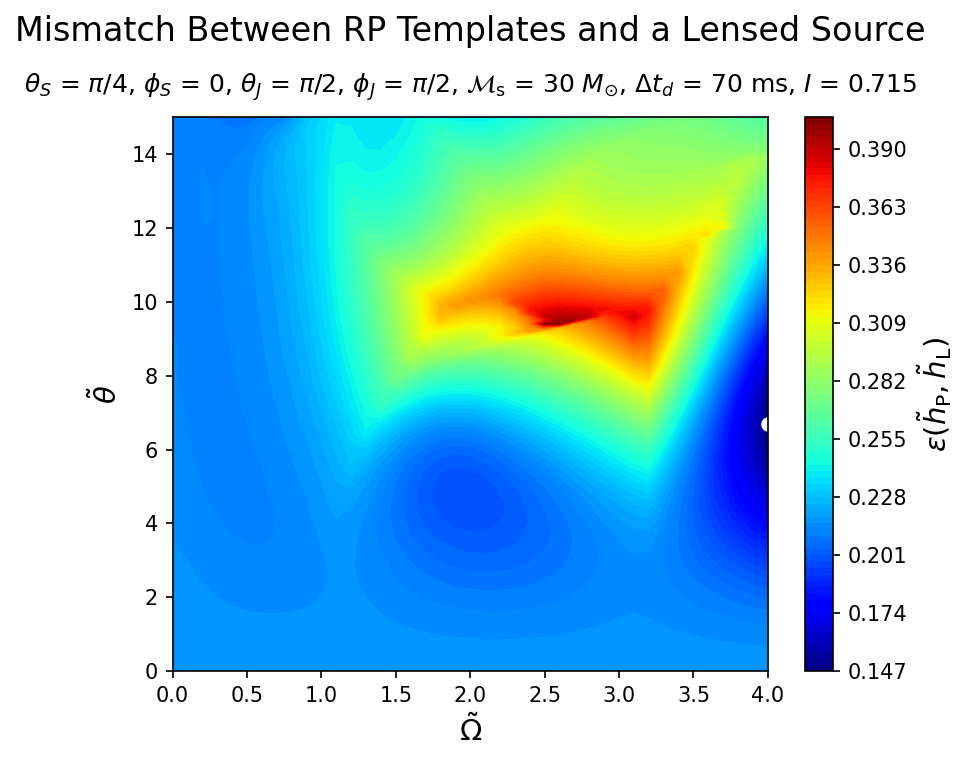

In [ ]:
from IPython.display import clear_output, display

td_slider = ipywidgets.SelectionSlider(
    options=td_arr, value=td_arr[0], description="td:"
)
display(td_slider)

I_slider = ipywidgets.SelectionSlider(options=I_arr, value=I_arr[0], description="I:")
display(I_slider)


def update_plot(change):
    clear_output(wait=True)
    display(td_slider)
    display(I_slider)
    td = td_slider.value
    I = I_slider.value
    plot_indiv_contour_from_dict(data[td], I, n_minima=1)


td_slider.observe(update_plot, names="value")
I_slider.observe(update_plot, names="value")

# as a function of $\Delta t_d$ while fixing $I$

theta_S = 0.785, phi_S = 0, theta_J = 1.57, phi_J = 1.57, mcz = 30 solar masses, I = 0.51


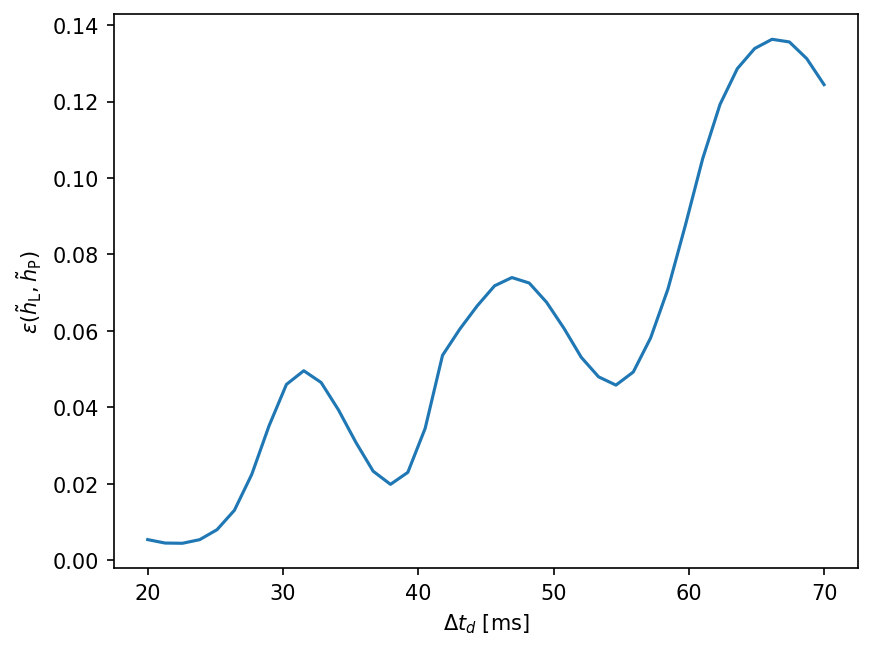

In [44]:
r = 20
td_ep_min_arr = ep_min_mtx[r, :]

plt.plot(td_arr * 1e3, td_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\epsilon(\~h_{\rm L}, \~h_{\rm P})$")

print(
    "theta_S = {:.3g}, phi_S = {:.3g}, theta_J = {:.3g}, phi_J = {:.3g}, mcz = {:.3g} solar masses, I = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        src_params["mcz"] / solar_mass,
        I_arr[r],
    )
)

In [45]:
td_best_omega_arr = best_omega_mtx[r, :]
omega_min_err_mtx = np.zeros_like(X)
omega_max_err_mtx = np.zeros_like(X)

for x, td in enumerate(td_arr):
    for y, I in enumerate(I_arr):
        omega_min_err_mtx[y, x] = np.min(data[td][I]["stats"]["omega_tilde_err"])
        omega_max_err_mtx[y, x] = np.max(data[td][I]["stats"]["omega_tilde_err"])

omega_err_arr = np.array(
    [
        td_best_omega_arr - omega_min_err_mtx[r, :],
        omega_max_err_mtx[r, :] - td_best_omega_arr,
    ]
)

theta_S = 0.785, phi_S = 0, theta_J = 1.57, phi_J = 1.57, mcz = 30 solar masses, I = 0.51


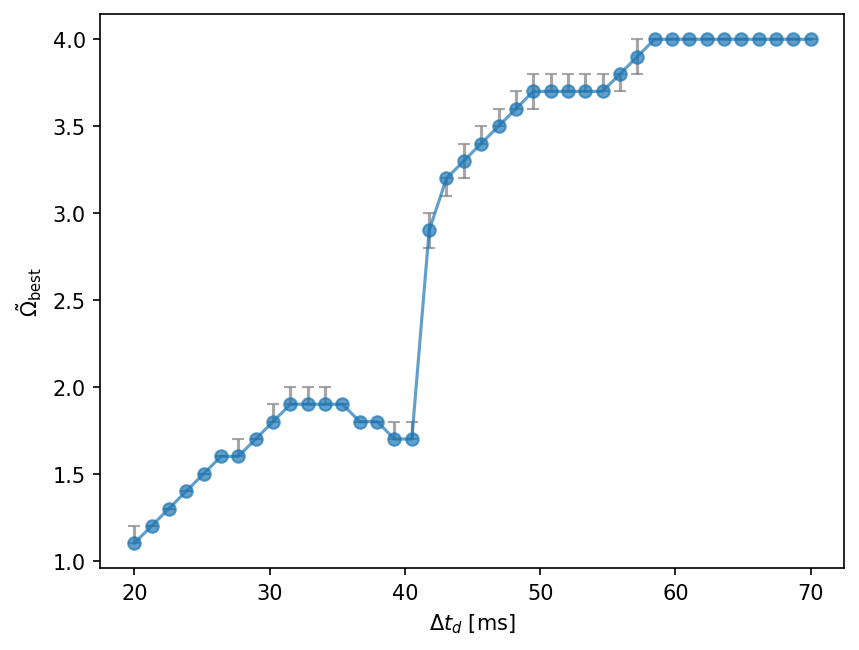

In [46]:
plt.errorbar(
    td_arr * 1e3,
    td_best_omega_arr,
    yerr=omega_err_arr,
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

print(
    "theta_S = {:.3g}, phi_S = {:.3g}, theta_J = {:.3g}, phi_J = {:.3g}, mcz = {:.3g} solar masses, I = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        src_params["mcz"] / solar_mass,
        I_arr[r],
    )
)

In [47]:
td_best_theta_arr = best_theta_mtx[r, :]
theta_min_err_mtx = np.zeros_like(X)
theta_max_err_mtx = np.zeros_like(X)

for x, td in enumerate(td_arr):
    for y, I in enumerate(I_arr):
        theta_min_err_mtx[y, x] = np.min(data[td][I]["stats"]["theta_tilde_err"])
        theta_max_err_mtx[y, x] = np.max(data[td][I]["stats"]["theta_tilde_err"])

theta_err_arr = np.array(
    [
        td_best_theta_arr - theta_min_err_mtx[r, :],
        theta_max_err_mtx[r, :] - td_best_theta_arr,
    ]
)

theta_S = 0.785, phi_S = 0, theta_J = 1.57, phi_J = 1.57, mcz = 30 solar masses, I = 0.51


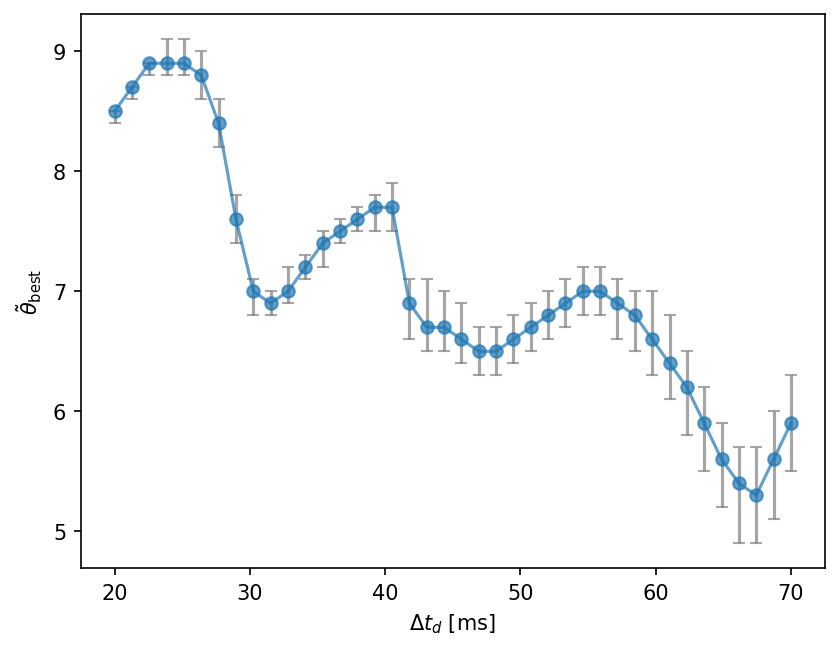

In [48]:
plt.errorbar(
    td_arr * 1e3,
    td_best_theta_arr,
    yerr=theta_err_arr,
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

print(
    "theta_S = {:.3g}, phi_S = {:.3g}, theta_J = {:.3g}, phi_J = {:.3g}, mcz = {:.3g} solar masses, I = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        src_params["mcz"] / solar_mass,
        I_arr[r],
    )
)

## track local minima

In [14]:
trackers = {}
for I in I_arr:
    trackers[I] = {}
    for step, td in enumerate(td_arr):
        ep_data = data[td][I]["contour"]["epsilon_matrix"]
        ep_thres = ep_min_mtx[r, :][-1] * 1.1
        trackers[I] = track_minima(
            trackers[I], ep_data, td, I_arr[r], step, ep_thres, dist_thres=1
        )

    # only keep the 4 longest trackers
    trackers[I] = dict(
        sorted(trackers[I].items(), key=lambda item: len(item[1]["coord_arr"]))[-4:]
    )

SelectionSlider(description='I:', index=20, options=(0.1, 0.120513, 0.141026, 0.161538, 0.182051, 0.202564, 0.…

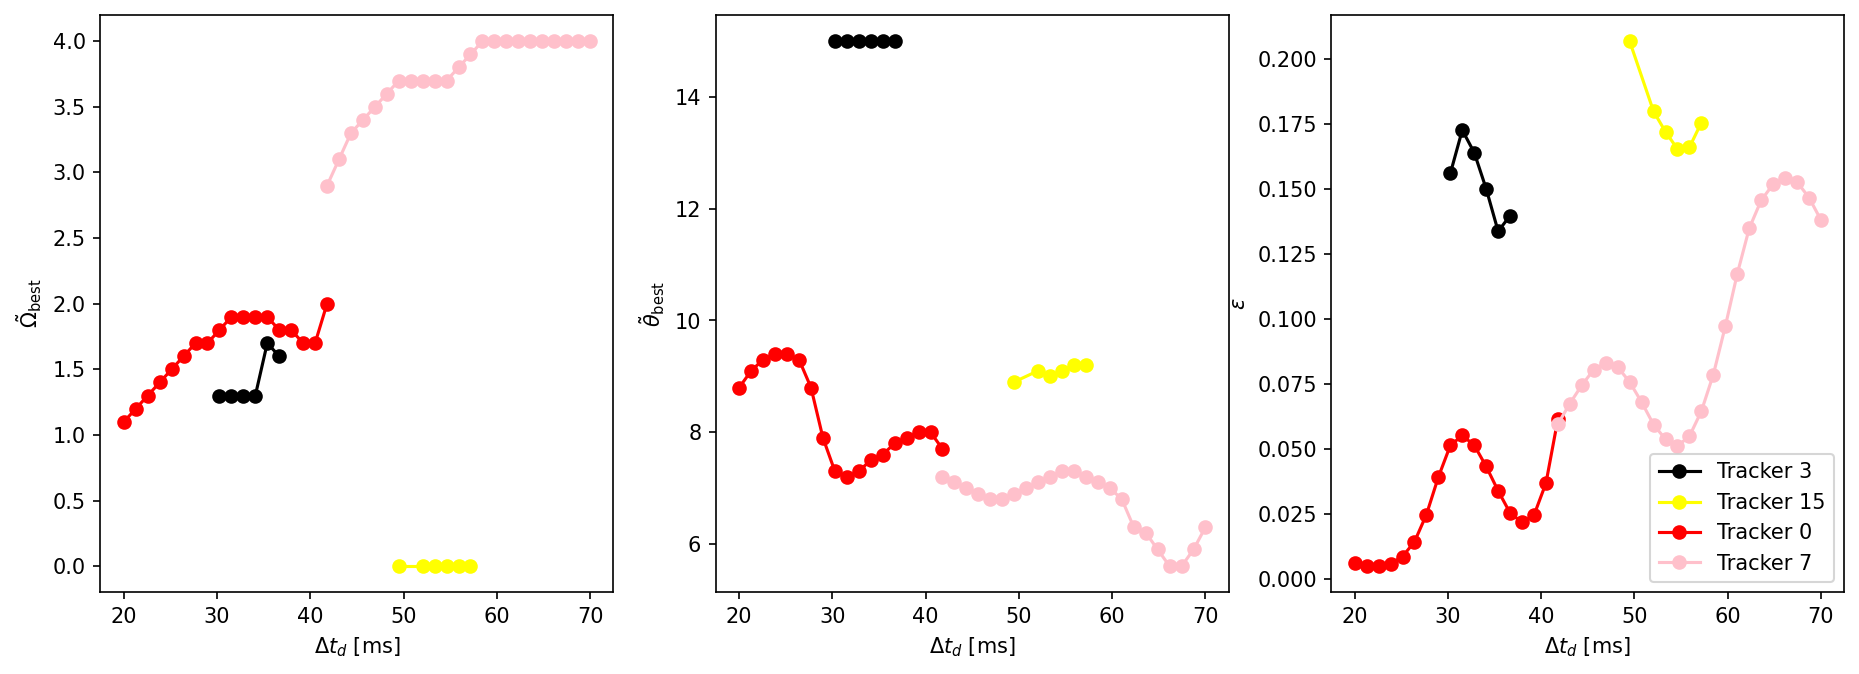

In [16]:
from IPython.display import clear_output

I_slider = ipywidgets.SelectionSlider(options=I_arr, value=I_arr[0], description="I:")
display(I_slider)


def update_plot(val):
    clear_output(wait=True)
    display(I_slider)
    I = val["new"]
    plot_trackers(trackers, I)


I_slider.observe(update_plot, names="value")

## plot individual contours after tracking

In [ ]:
colors = ["black", "yellow", "red", "pink"]
from IPython.display import clear_output

td_slider = ipywidgets.SelectionSlider(
    options=td_arr, value=td_arr[0], description="td:"
)
display(td_slider)


def update_plot(val):
    clear_output(wait=True)
    display(td_slider)
    td = val["new"]
    plot_indiv_contour_from_dict(data[td], I_arr[r], n_minima=0)
    for key, tracker in trackers.items():
        if td in tracker["td_arr"]:
            idx = np.where(tracker["td_arr"] == td)[0][0]
            plt.plot(
                tracker["coord_arr"][idx][0],
                tracker["coord_arr"][idx][1],
                "o",
                color=colors[list(trackers.keys()).index(key)],
            )


td_slider.observe(update_plot, names="value")

# as a function of $I$ while fixing $\Delta t_d$

In [40]:
c = 10
data_I = data[td_arr[c]]

theta_S = 0.785, phi_S = 0, theta_J = 1.57, phi_J = 1.57, mcz = 30 solar masses, td = 32.8 ms


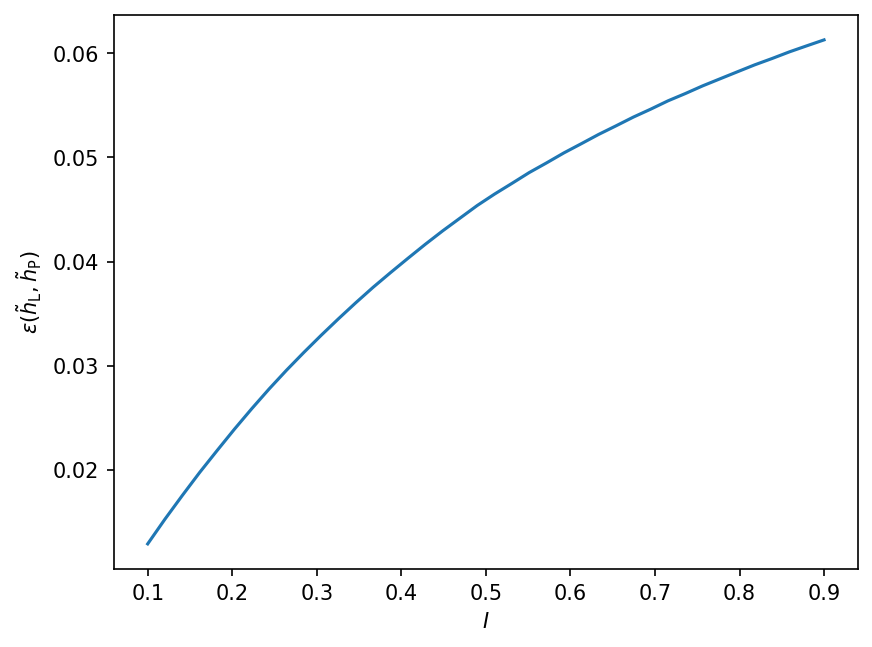

In [41]:
I_ep_min_arr = np.array([data_I[I]["stats"]["ep_min"] for I in I_arr])

plt.plot(I_arr, I_ep_min_arr, label=r"$\epsilon(\~h_{\rm L}, \~h_{\rm P})$")
plt.xlabel(r"$I$")
plt.ylabel(r"$\epsilon(\~h_{\rm L}, \~h_{\rm P})$")

print(
    "theta_S = {:.3g}, phi_S = {:.3g}, theta_J = {:.3g}, phi_J = {:.3g}, mcz = {:.3g} solar masses, td = {:.3g} ms".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        src_params["mcz"] / solar_mass,
        data_I["td"] * 1e3,
    )
)

theta_S = 0.785, phi_S = 0, theta_J = 1.57, phi_J = 1.57, mcz = 30 solar masses, td = 32.8 ms


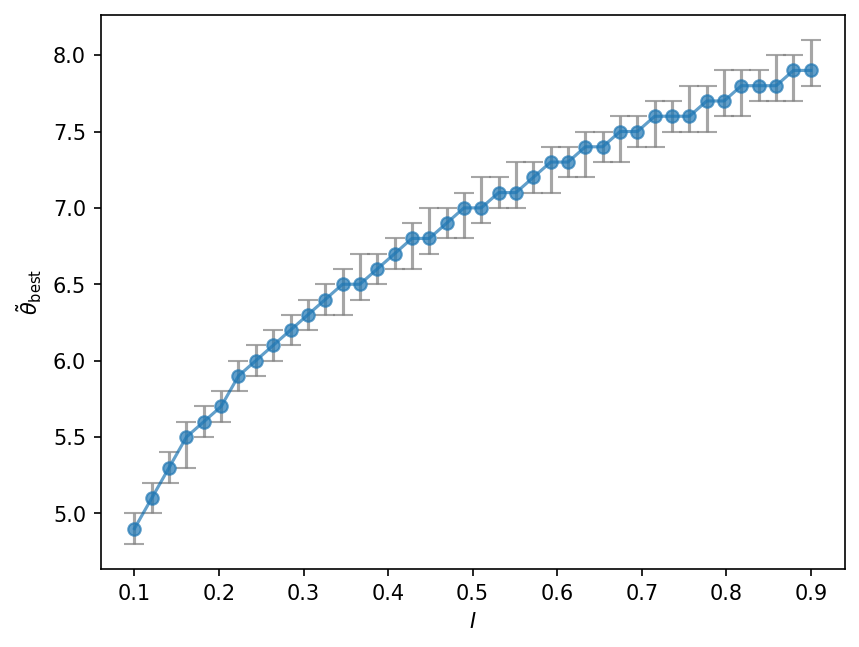

In [42]:
I_best_theta_arr = np.array([data_I[I]["stats"]["ep_min_theta_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_theta_arr,
    yerr=get_asym_err(data_I, I_arr, "theta_tilde"),
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

print(
    "theta_S = {:.3g}, phi_S = {:.3g}, theta_J = {:.3g}, phi_J = {:.3g}, mcz = {:.3g} solar masses, td = {:.3g} ms".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        src_params["mcz"] / solar_mass,
        data_I["td"] * 1e3,
    )
)

theta_S = 0.785, phi_S = 0, theta_J = 1.57, phi_J = 1.57, mcz = 30 solar masses, td = 32.8 ms


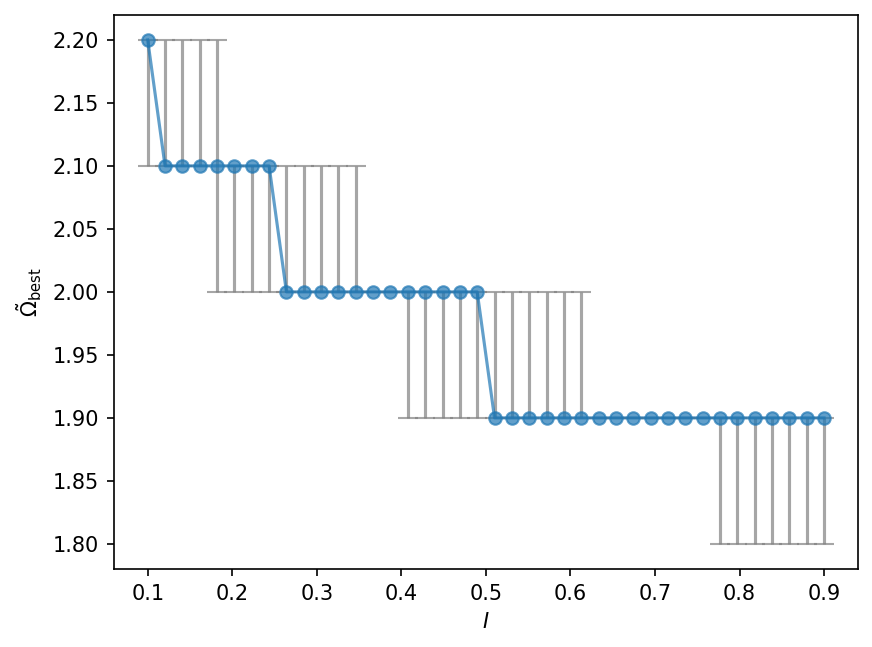

In [43]:
I_best_omega_arr = np.array([data_I[I]["stats"]["ep_min_omega_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_omega_arr,
    yerr=get_asym_err(data_I, I_arr, "omega_tilde"),
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

print(
    "theta_S = {:.3g}, phi_S = {:.3g}, theta_J = {:.3g}, phi_J = {:.3g}, mcz = {:.3g} solar masses, td = {:.3g} ms".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        src_params["mcz"] / solar_mass,
        data_I["td"] * 1e3,
    )
)

# waveform comparison

idx = 1.76e-09, phi = 1.25e-08, both should be ~0 if get_updated_mismatch_results is True


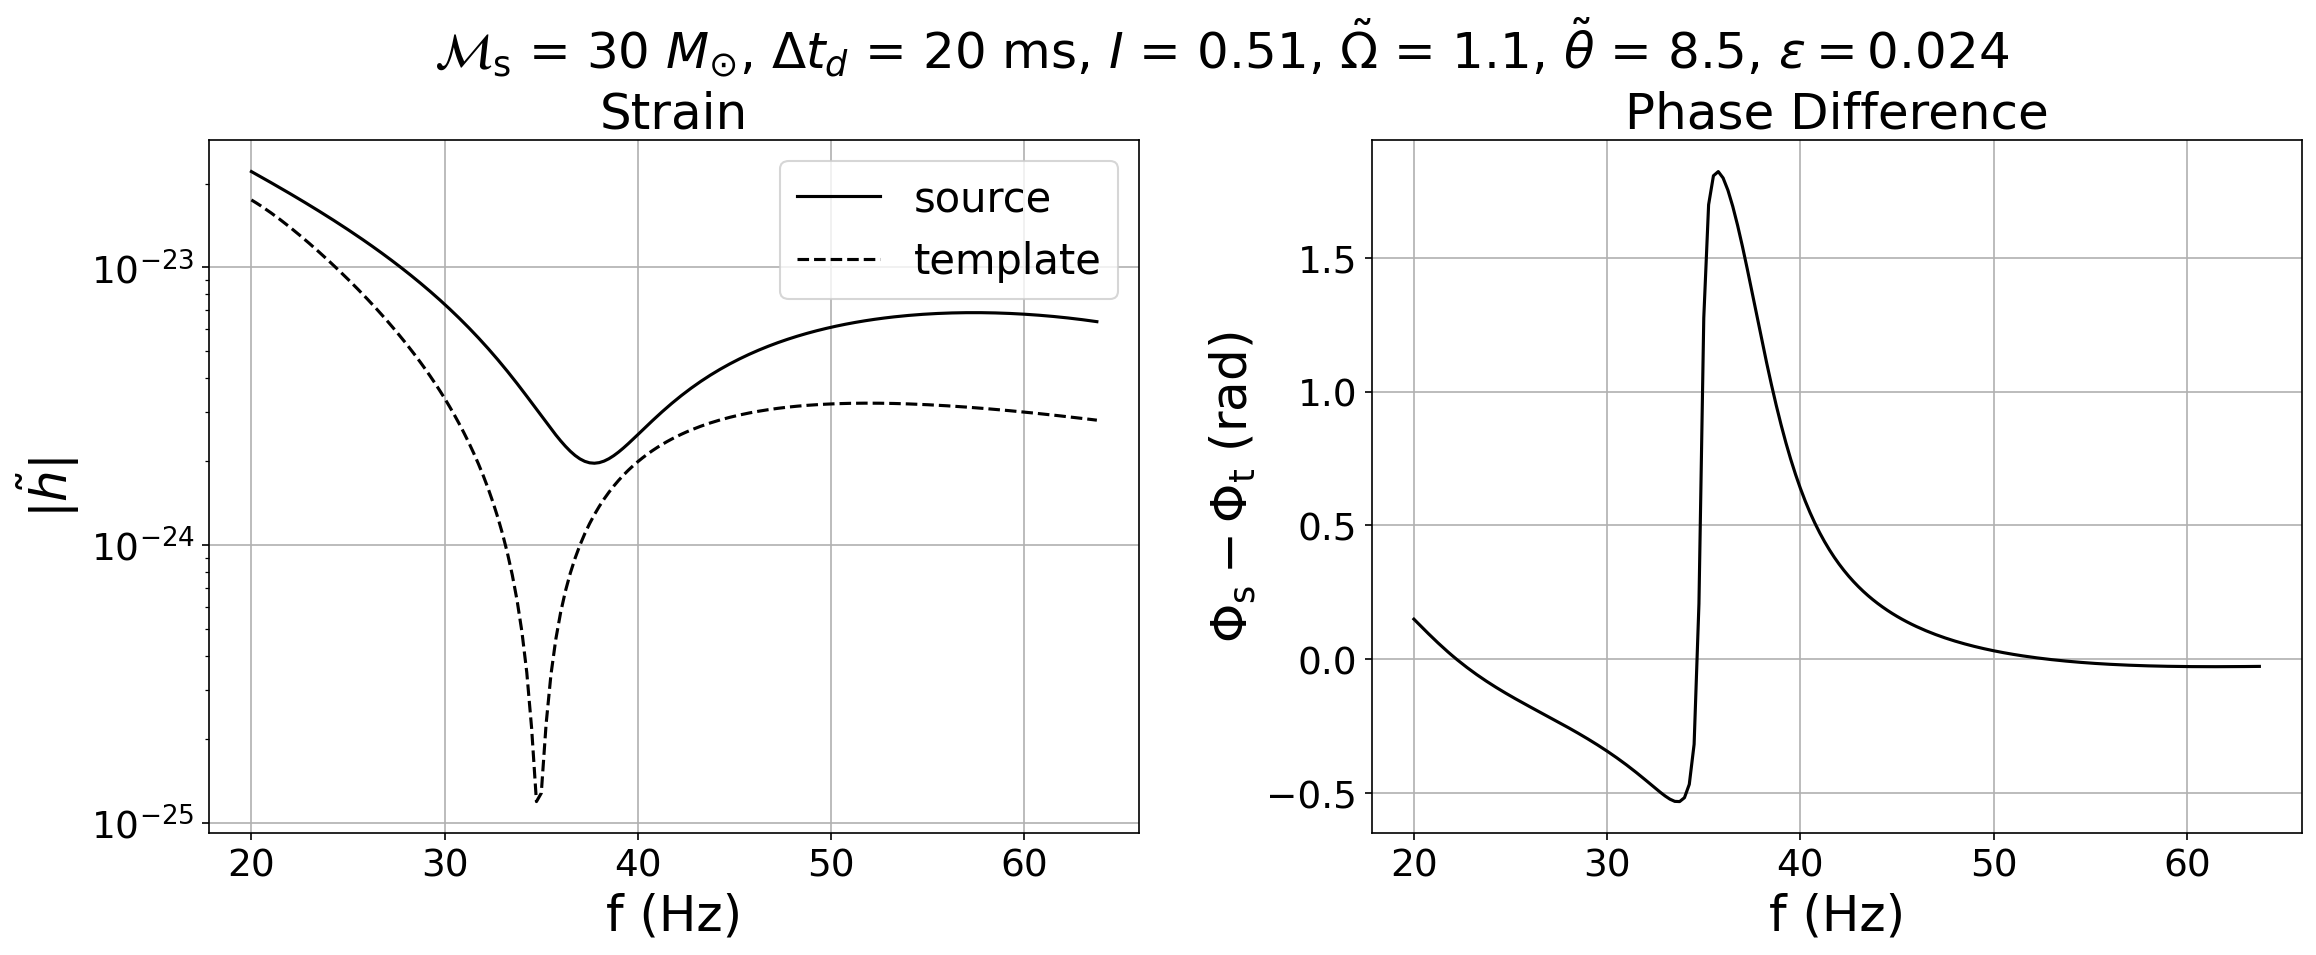

idx = 1.02e-08, phi = -8.53e-10, both should be ~0 if get_updated_mismatch_results is True


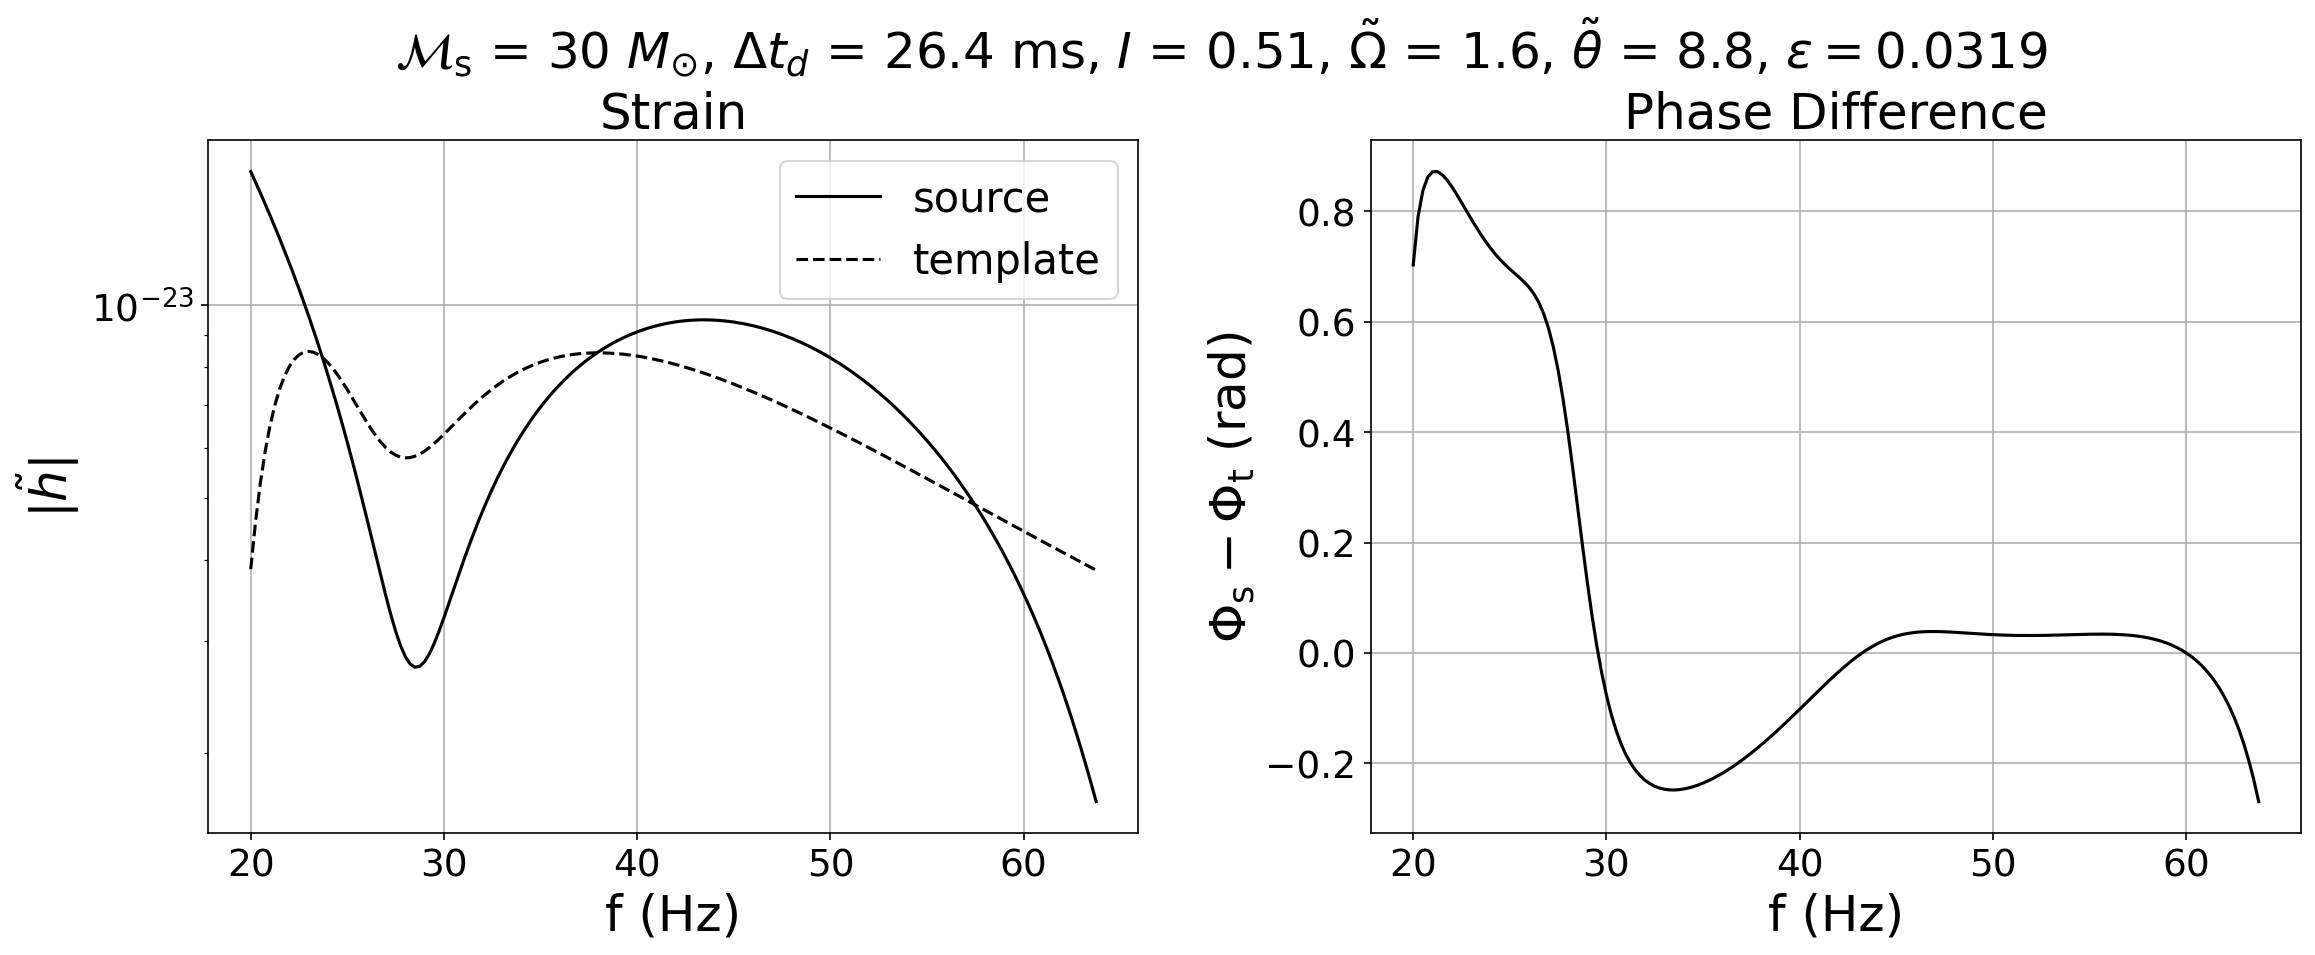

idx = 3.79e-10, phi = 1.4e-08, both should be ~0 if get_updated_mismatch_results is True


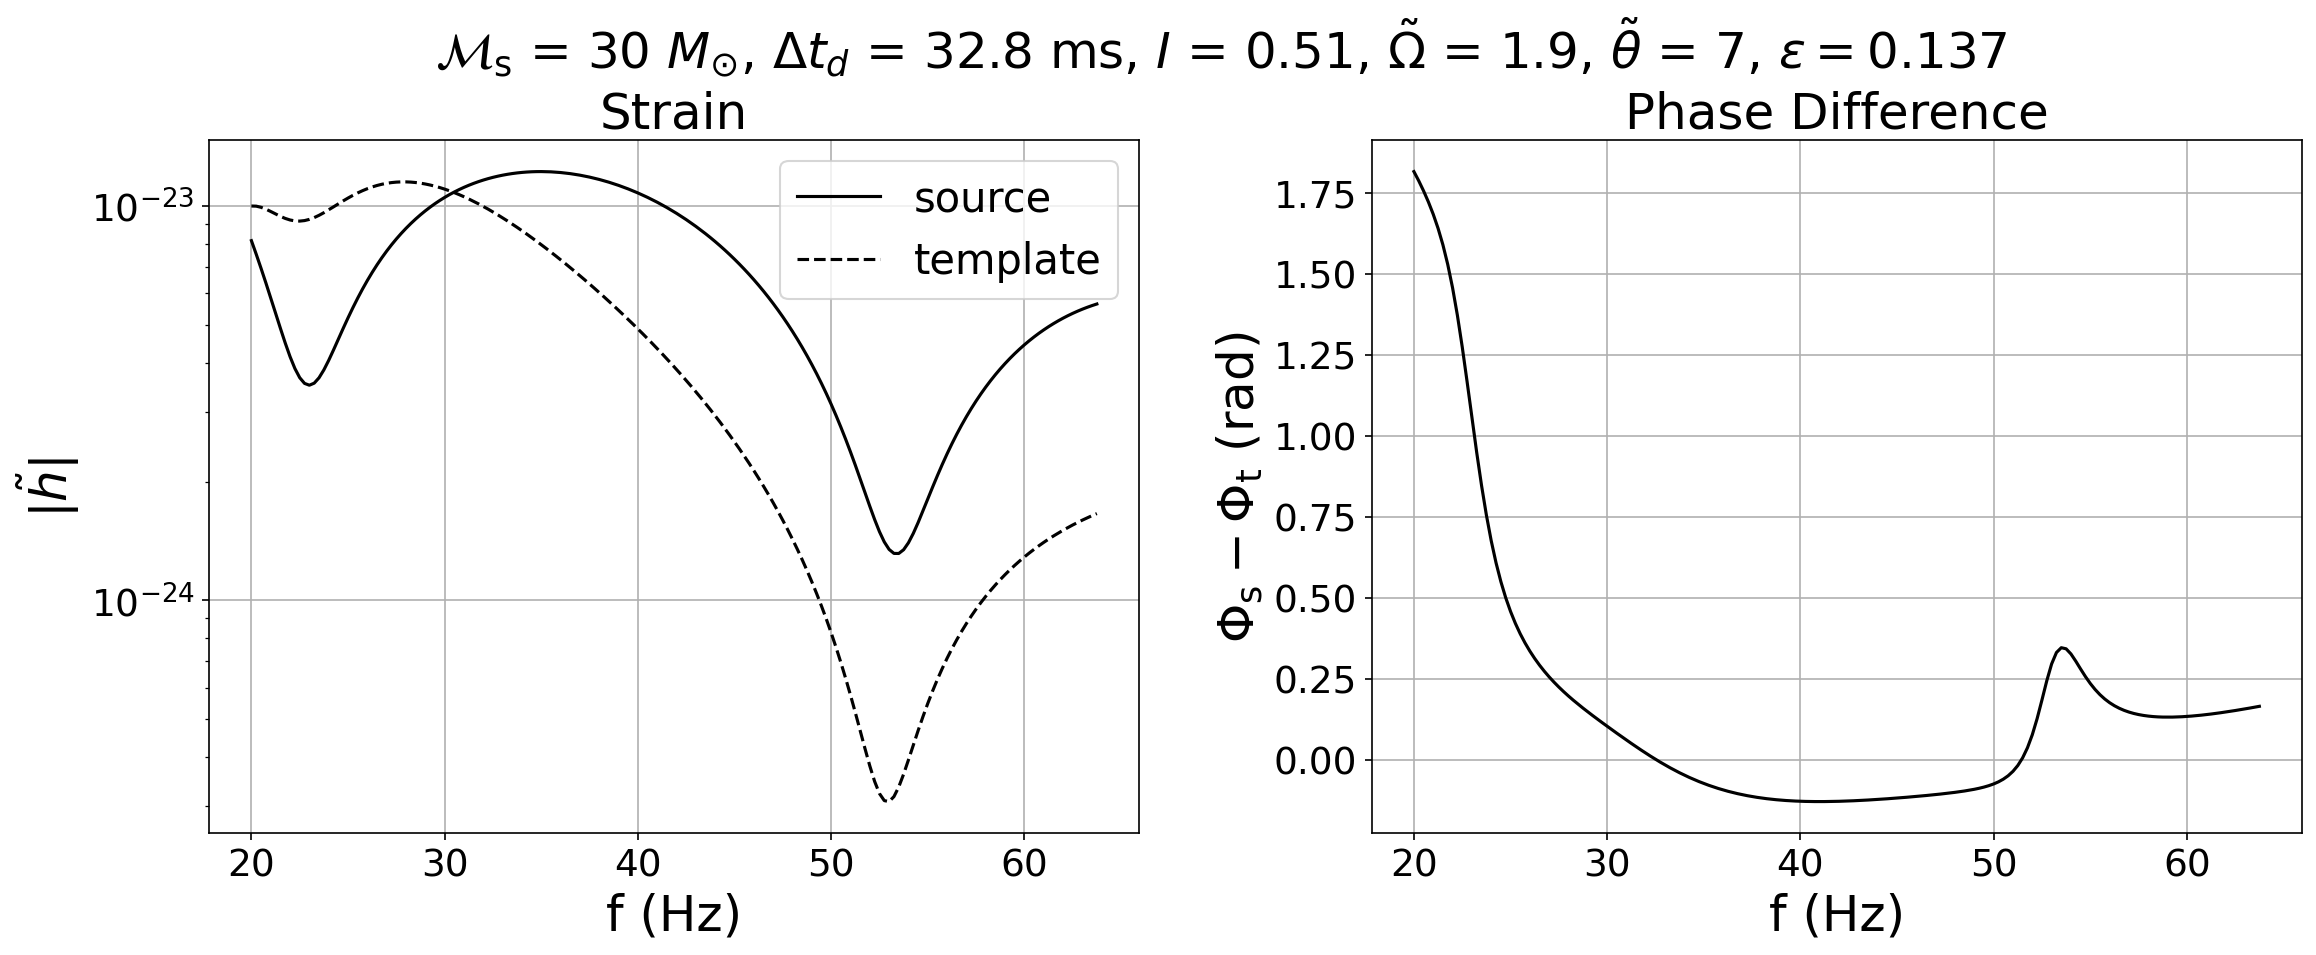

idx = 1.89e-09, phi = 1.34e-08, both should be ~0 if get_updated_mismatch_results is True


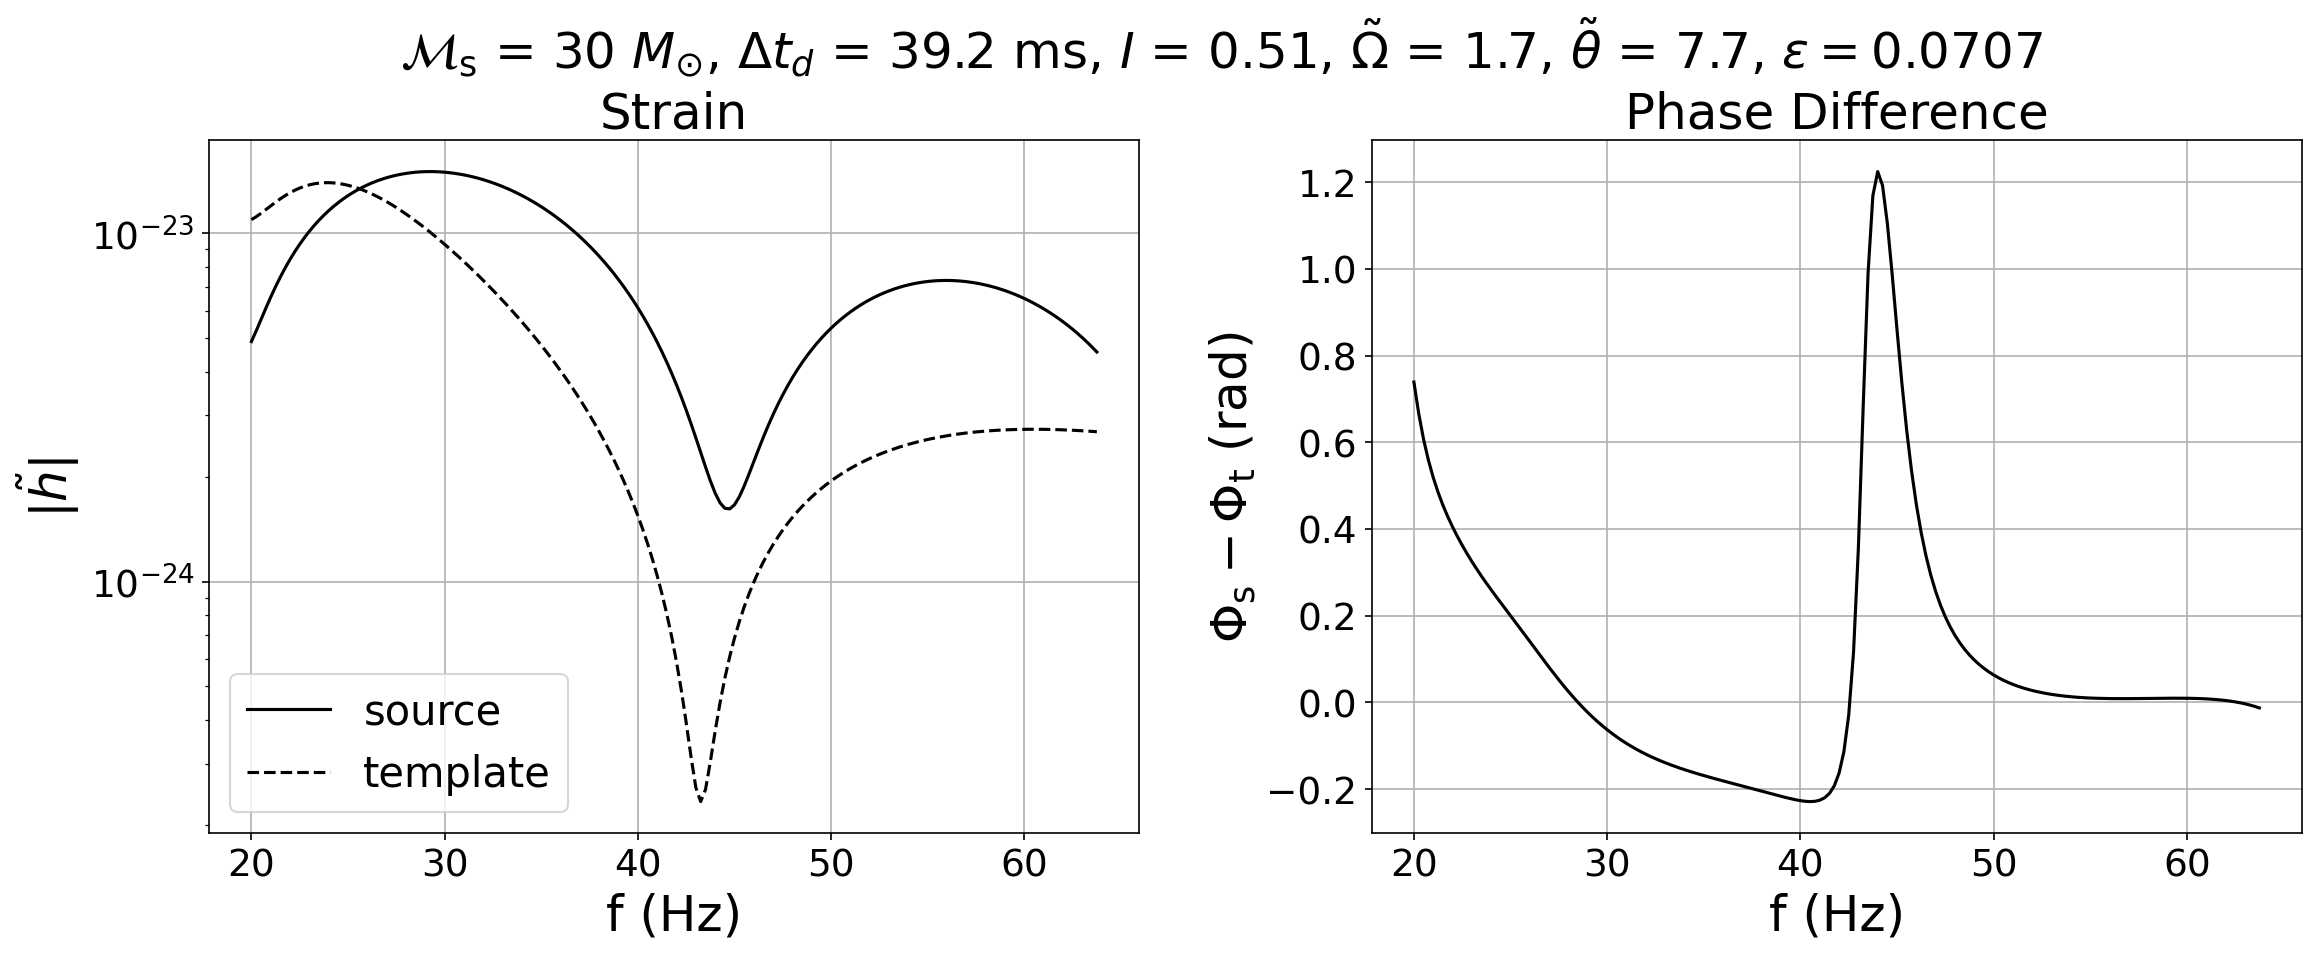

idx = -1.83e-08, phi = 8.44e-10, both should be ~0 if get_updated_mismatch_results is True


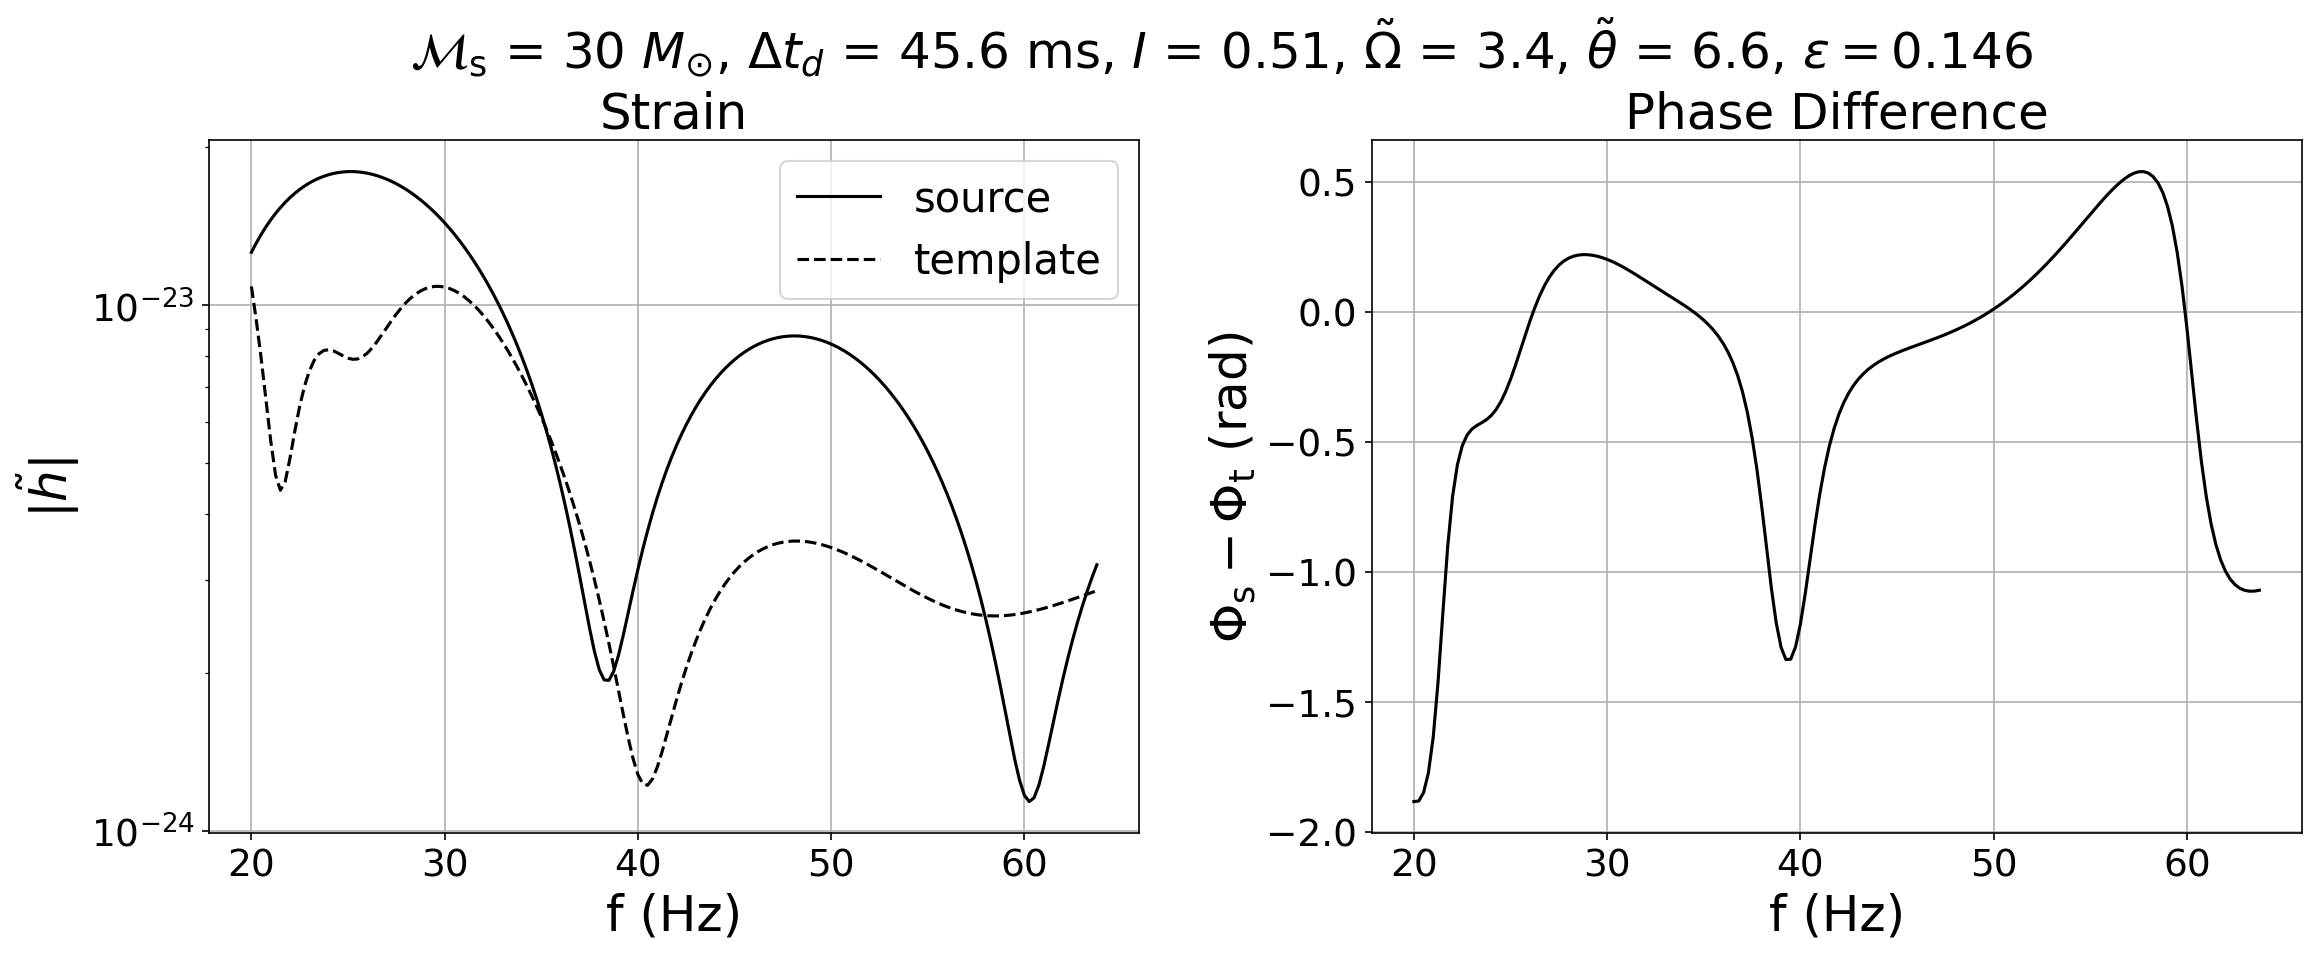

idx = -1.14e-08, phi = 3.83e-08, both should be ~0 if get_updated_mismatch_results is True


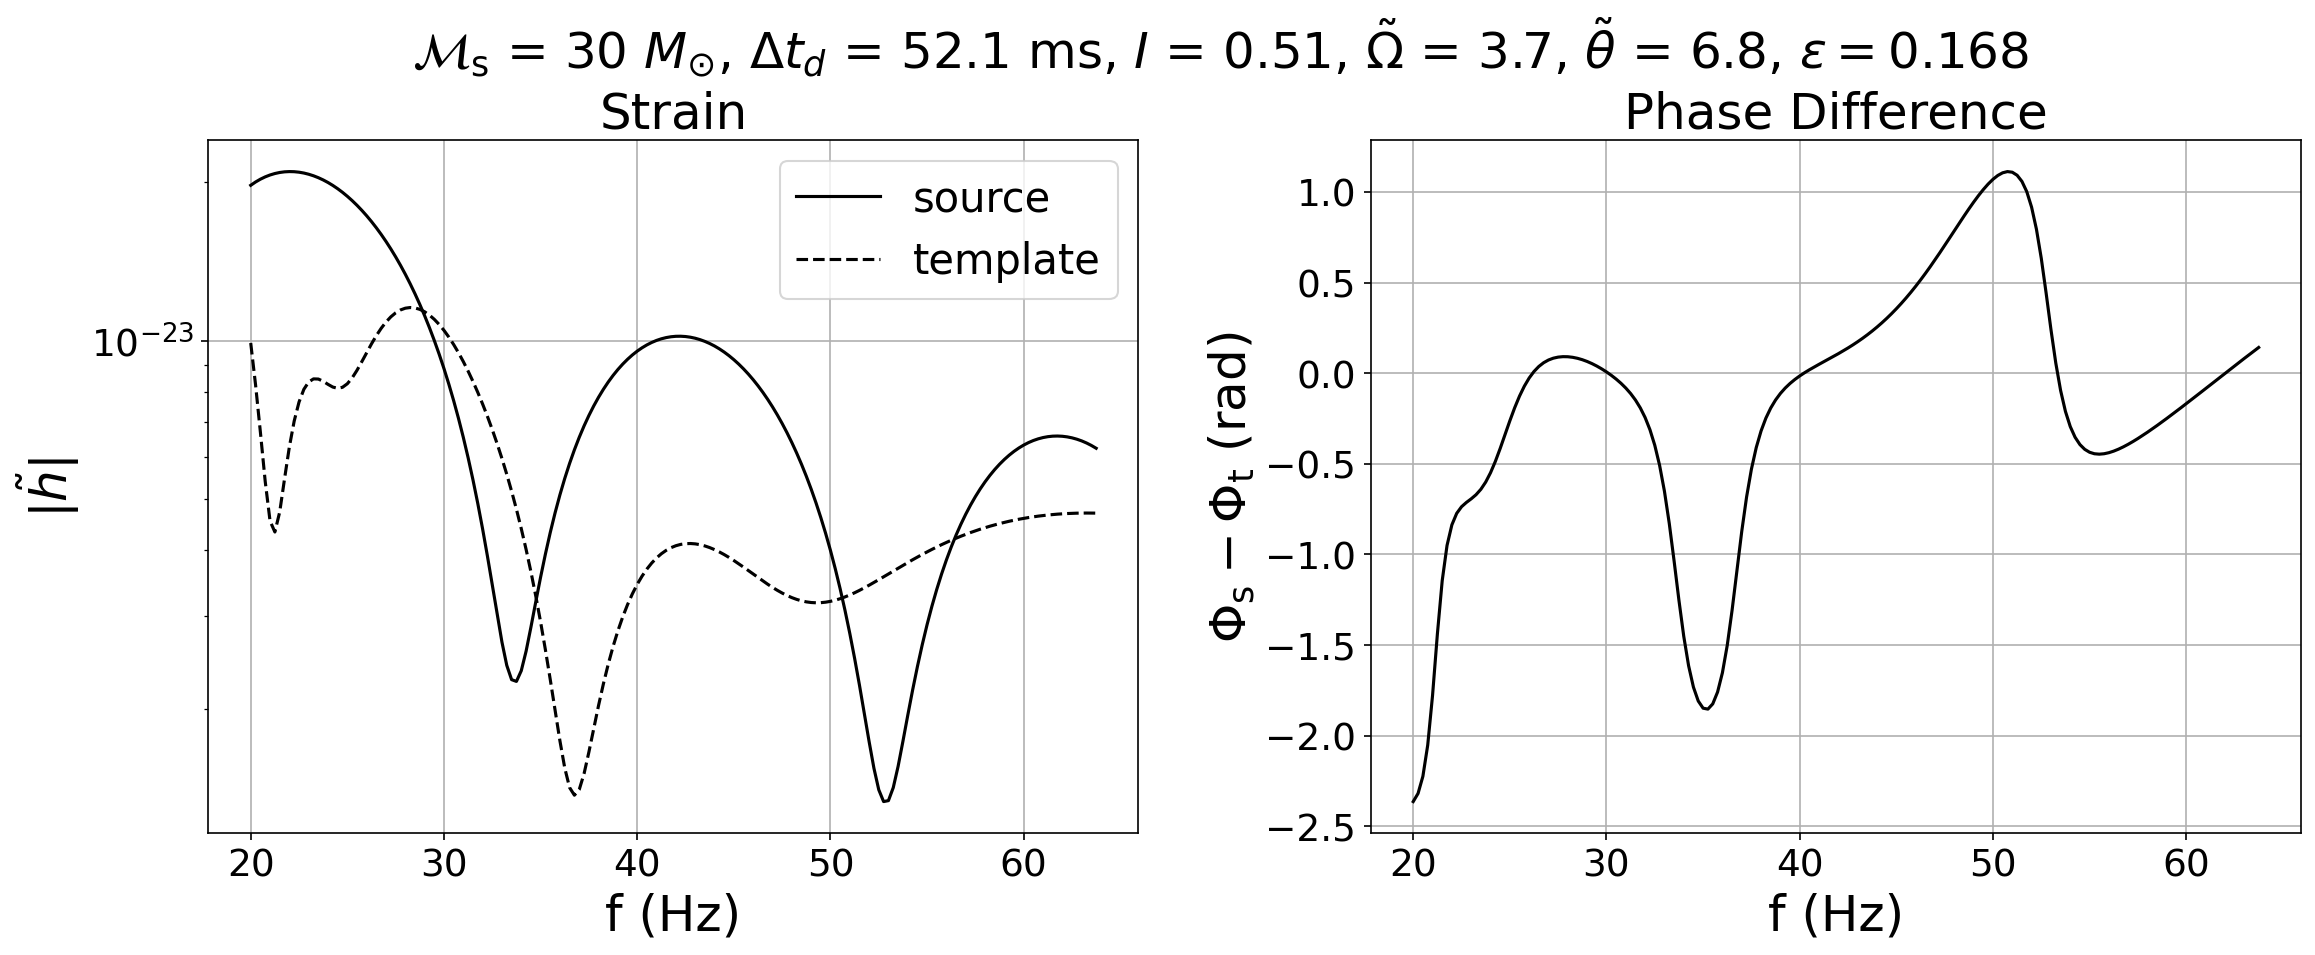

idx = 1.67e-08, phi = -4.38e-09, both should be ~0 if get_updated_mismatch_results is True


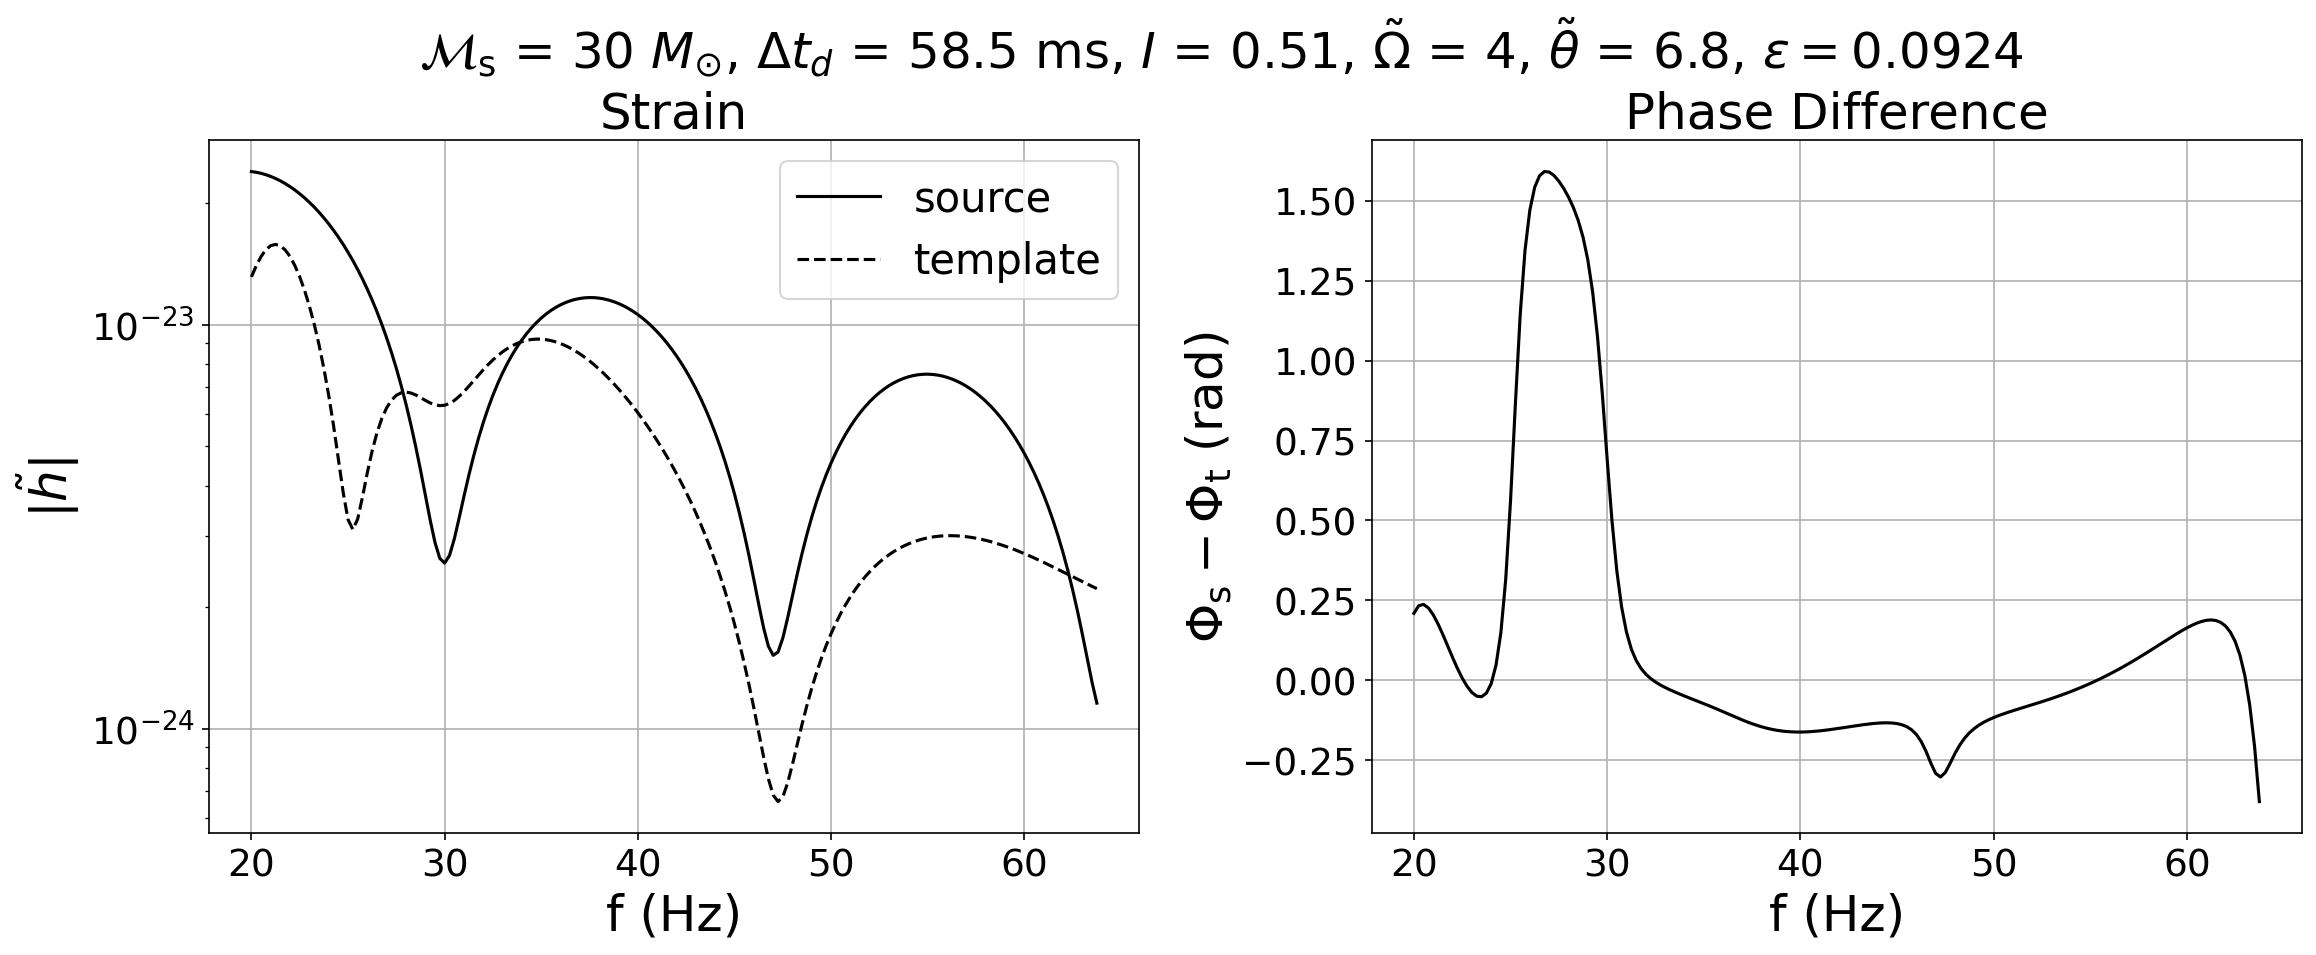

idx = 3.36e-08, phi = -4.87e-08, both should be ~0 if get_updated_mismatch_results is True


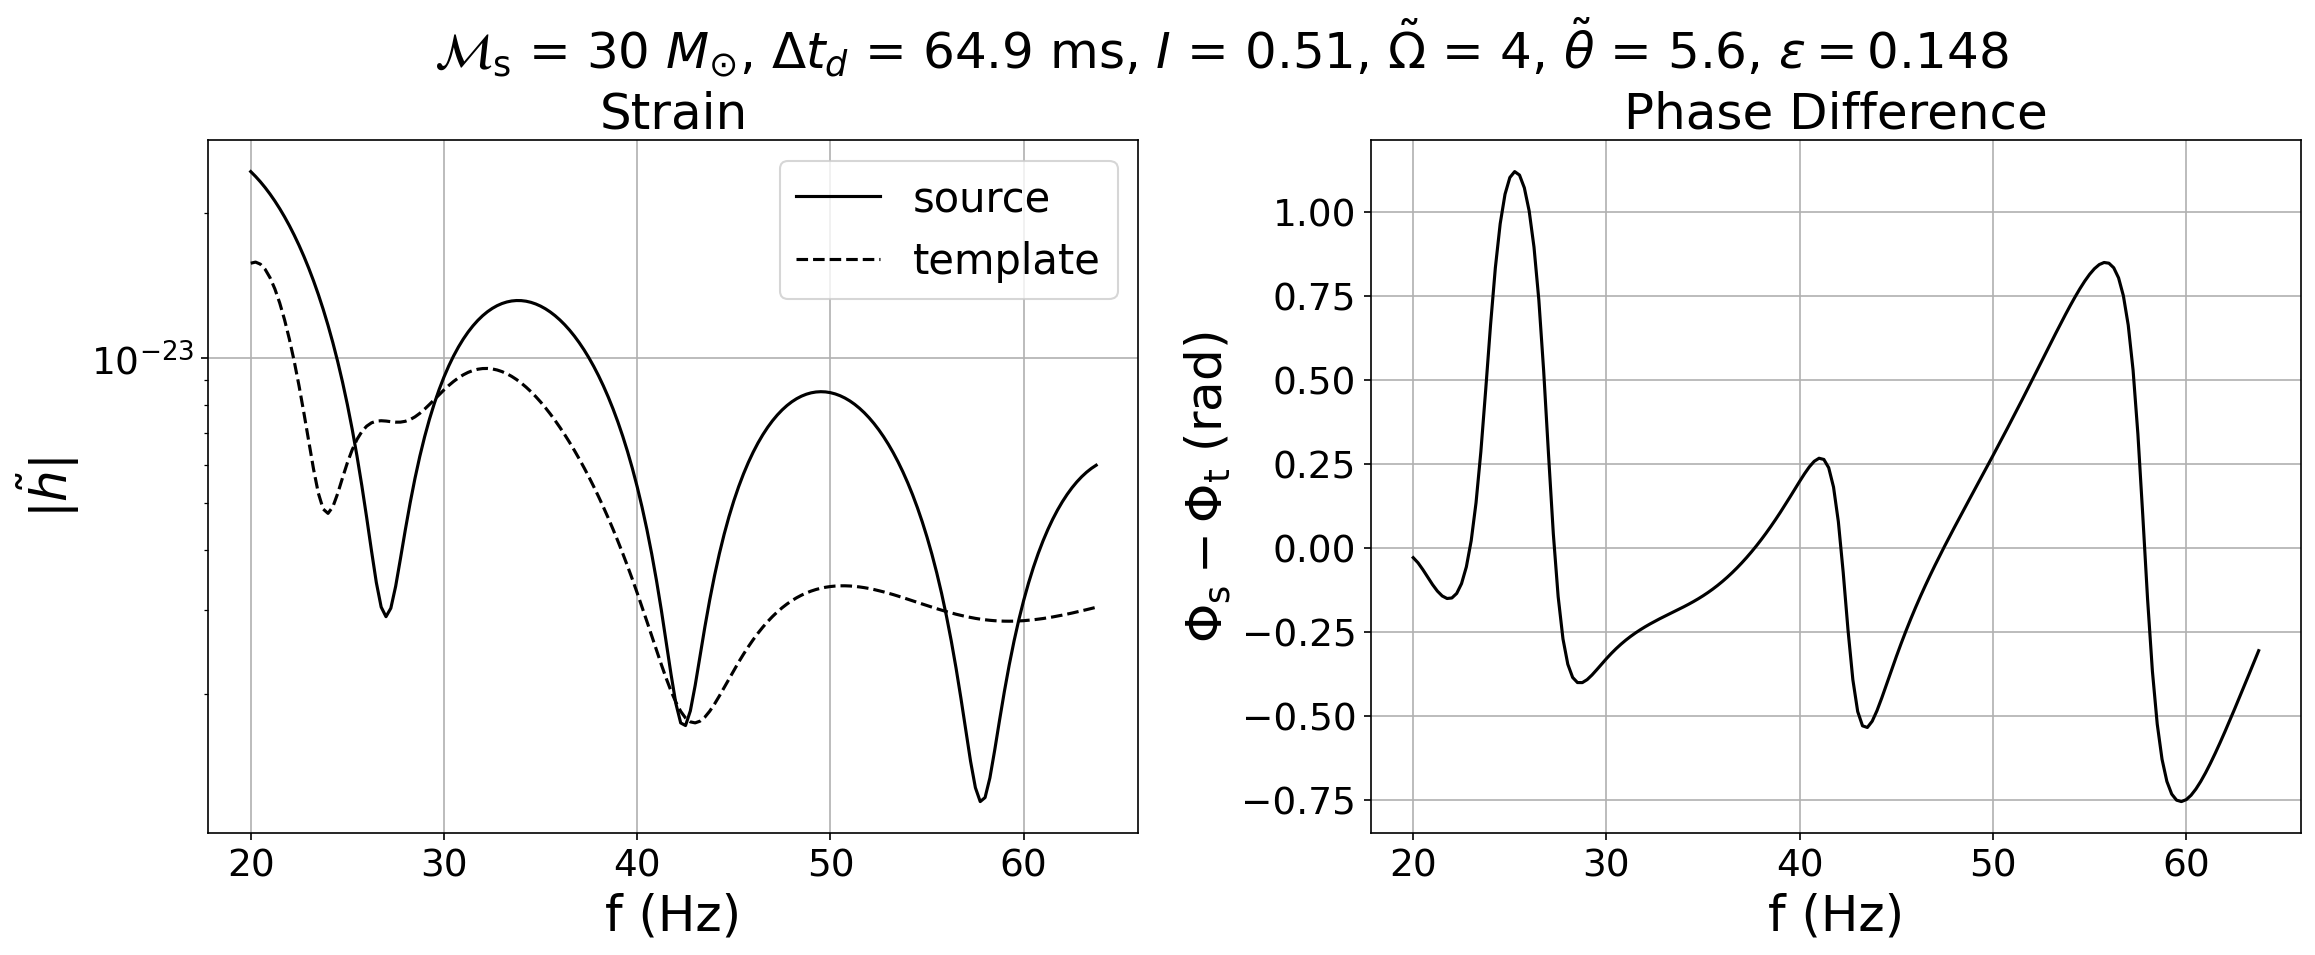

In [18]:
I = I_arr[20]
data_td = {}
for td in td_arr:
    data_td[td] = data[td][I]

lens_params_2 = data["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

y = get_y_from_I(I)
MLz_arr = get_MLz_from_td(td_arr, y)

for i in range(0, len(MLz_arr), 5):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["y"] = y
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_td[td_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()

idx = 4.07e-09, phi = 7.59e-09, both should be ~0 if get_updated_mismatch_results is True


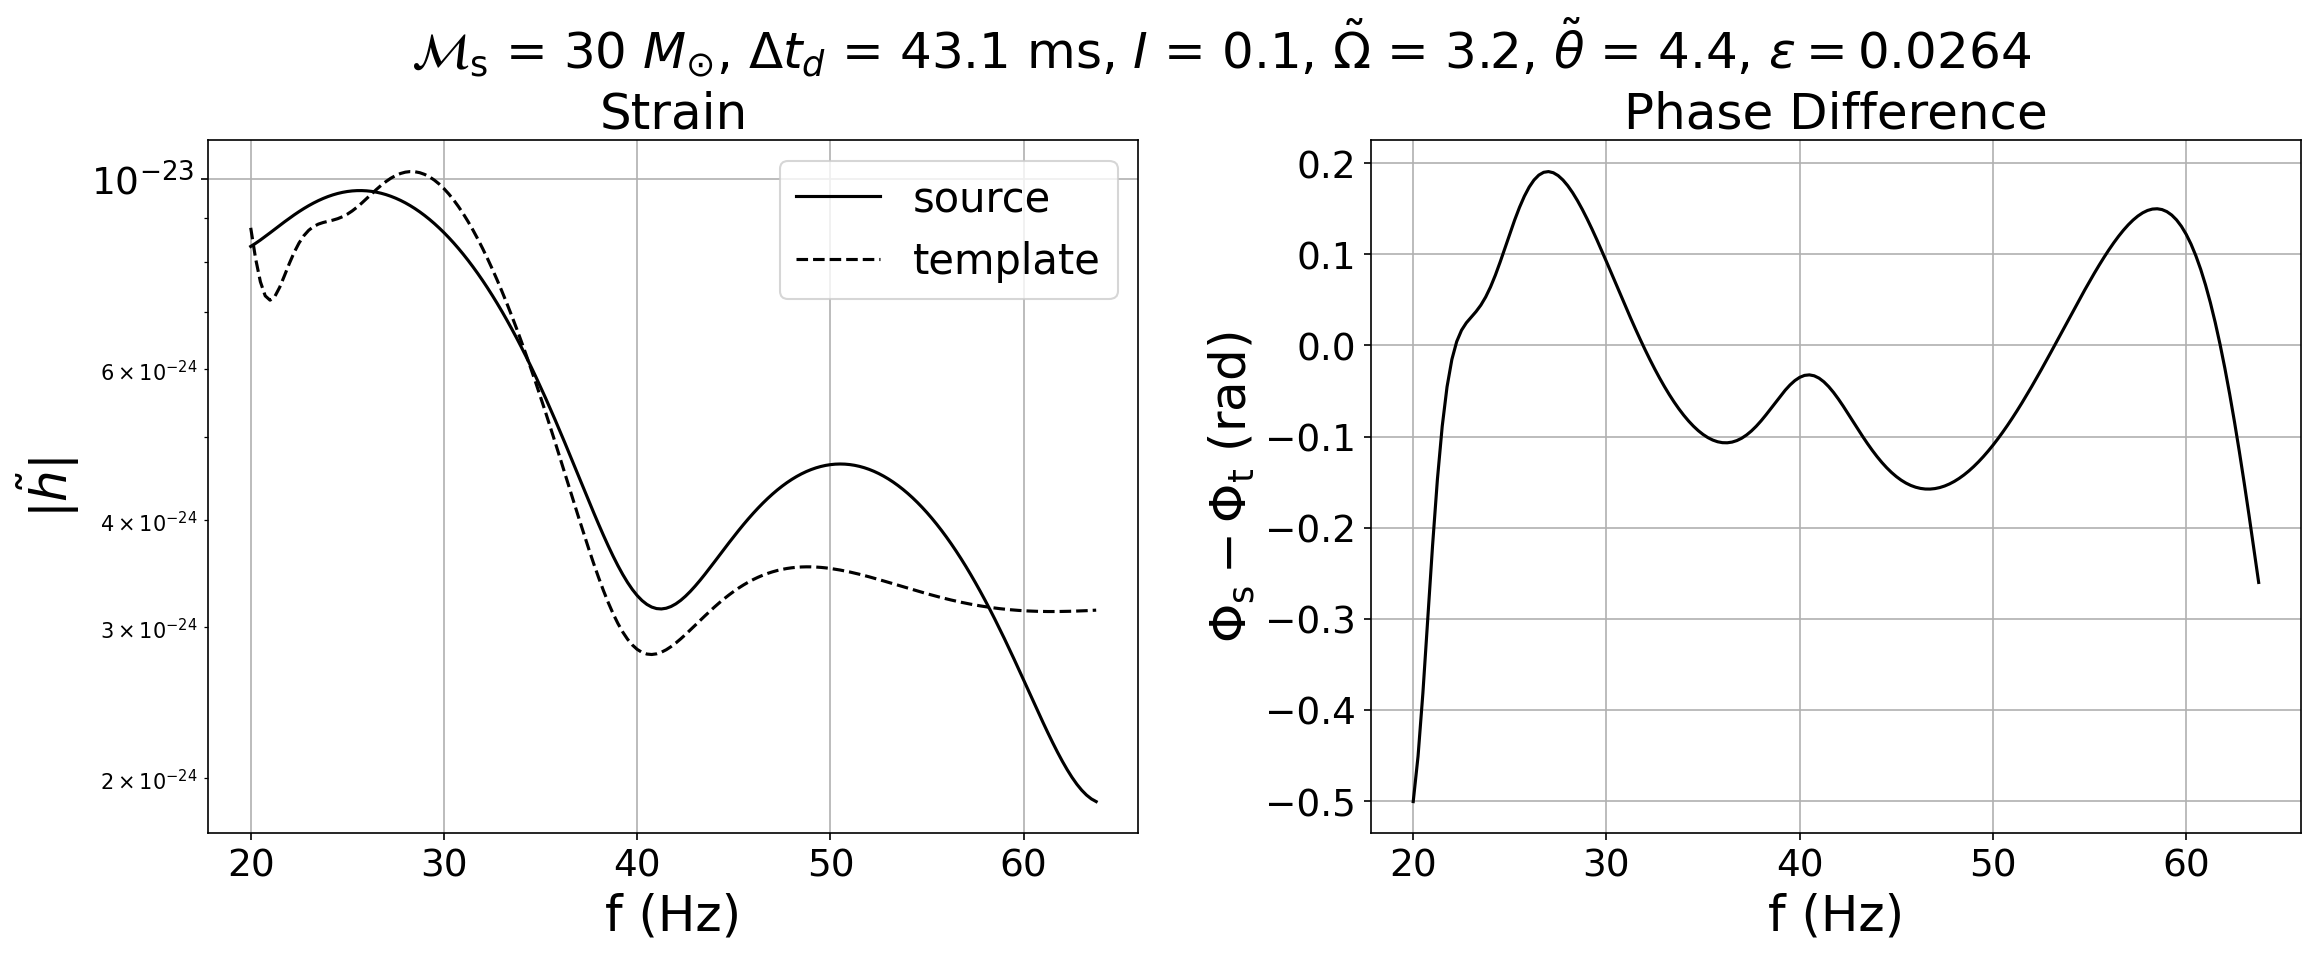

idx = 3.01e-08, phi = -1.14e-08, both should be ~0 if get_updated_mismatch_results is True


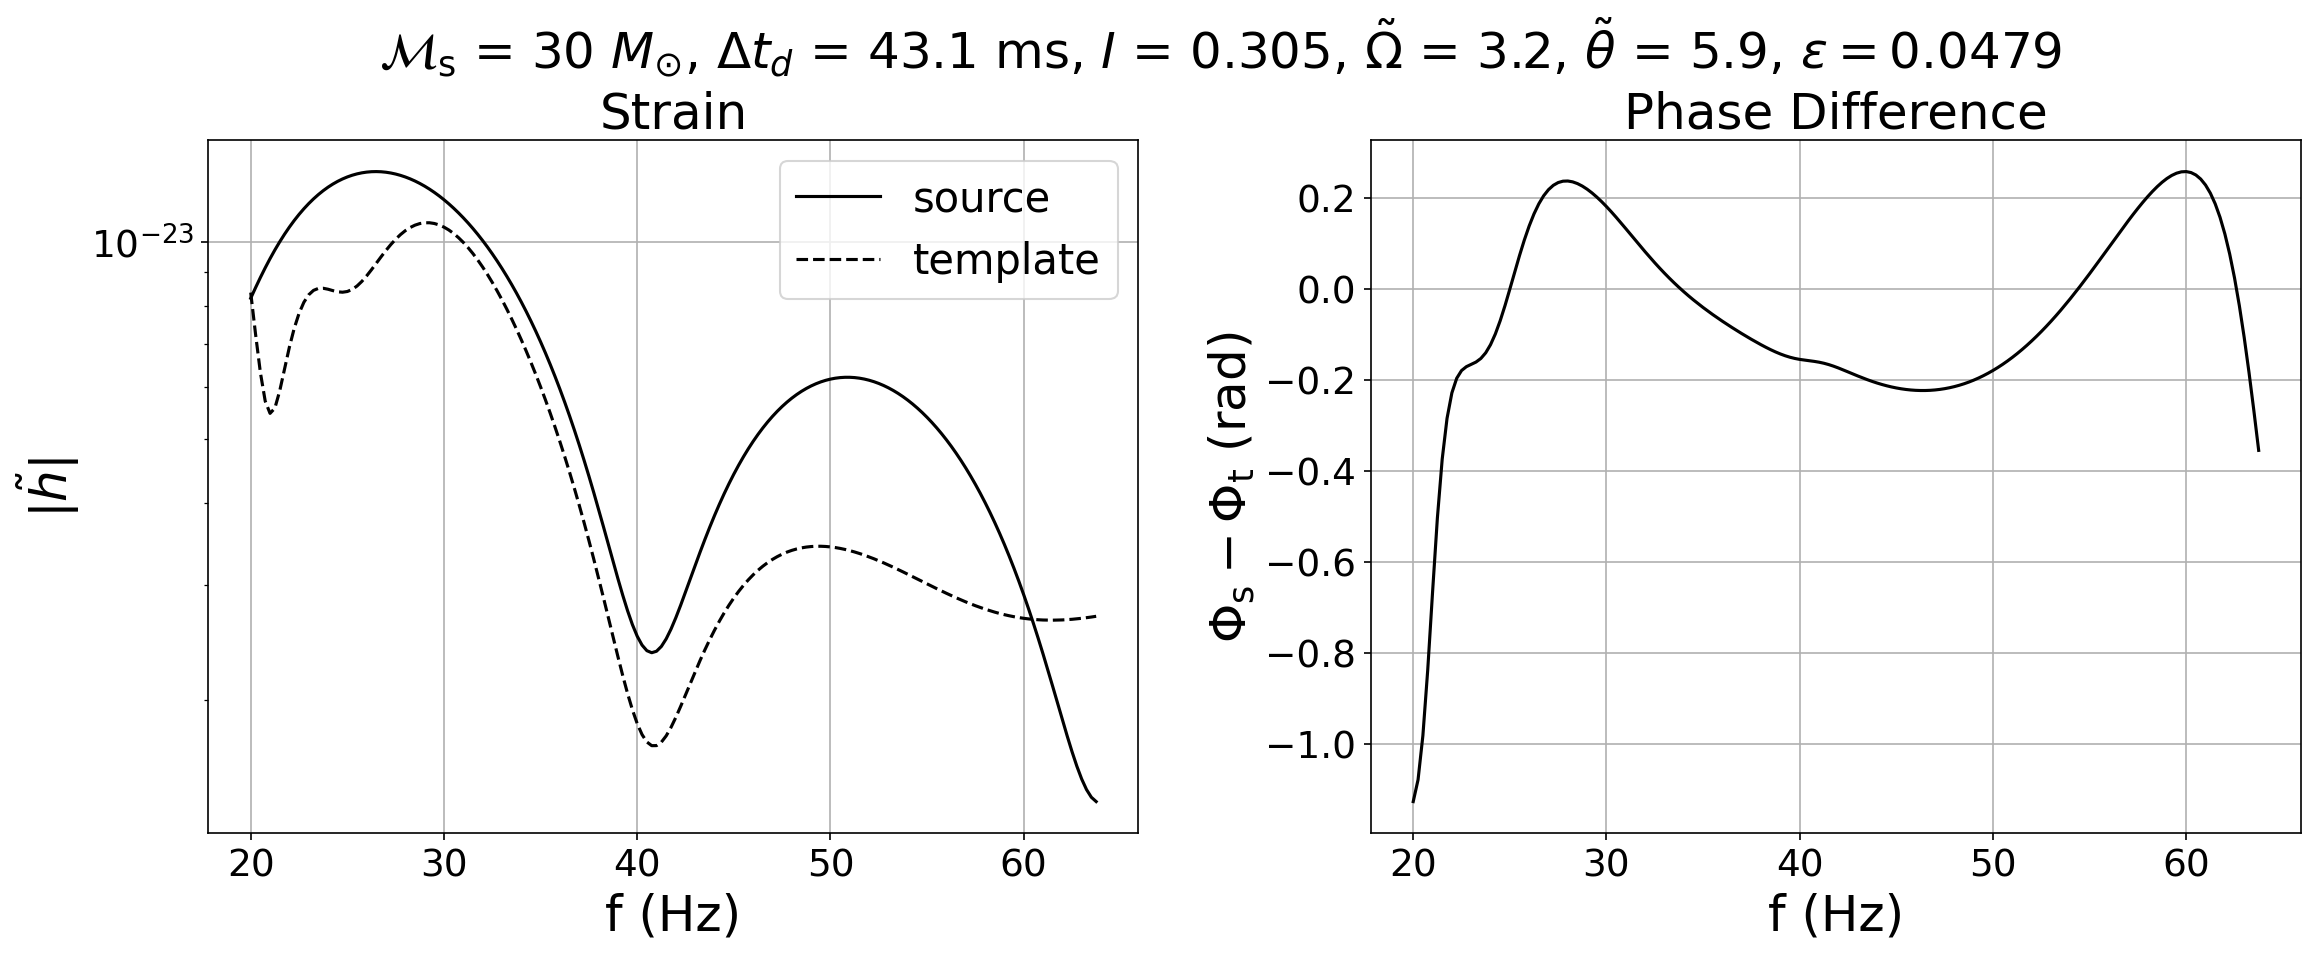

idx = -1.02e-08, phi = -1.83e-08, both should be ~0 if get_updated_mismatch_results is True


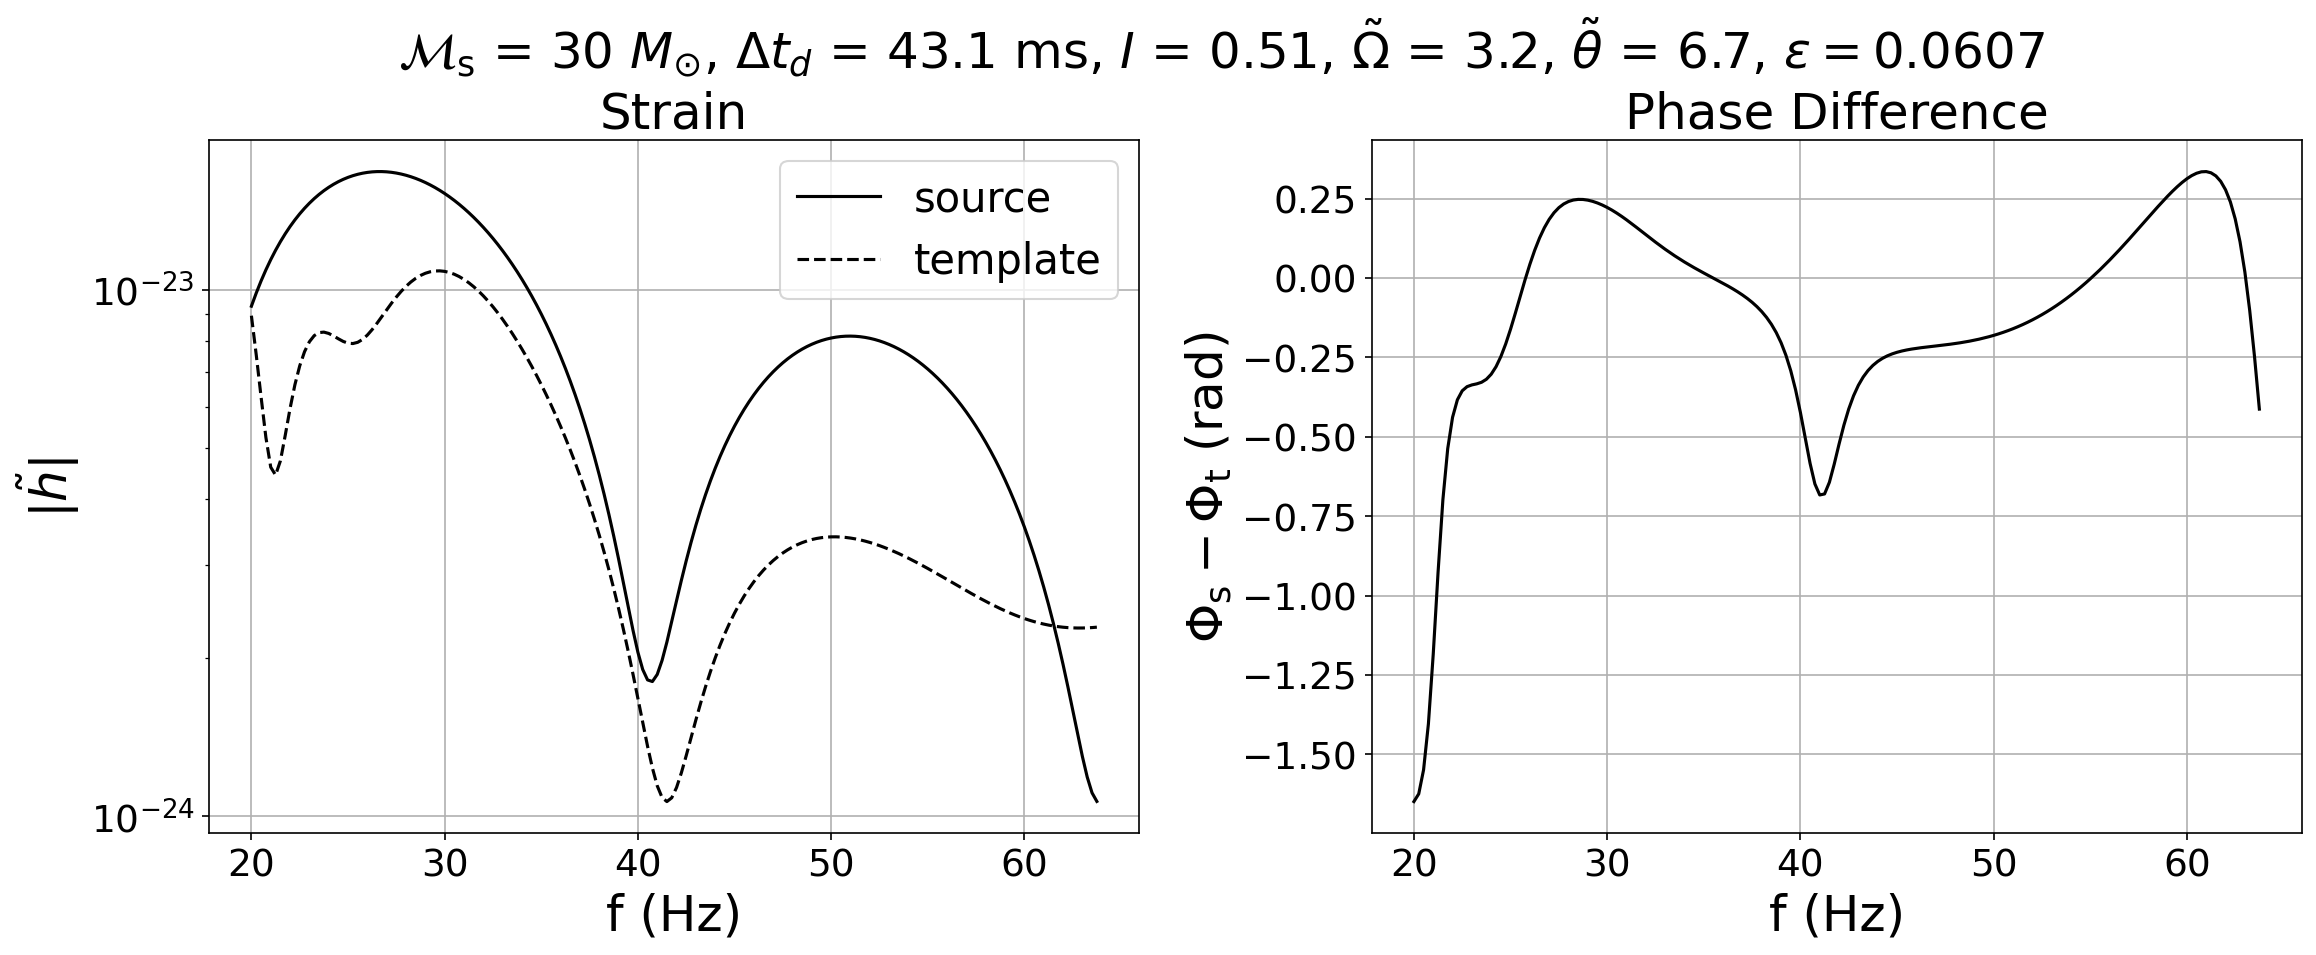

idx = -7.2e-09, phi = 3.81e-09, both should be ~0 if get_updated_mismatch_results is True


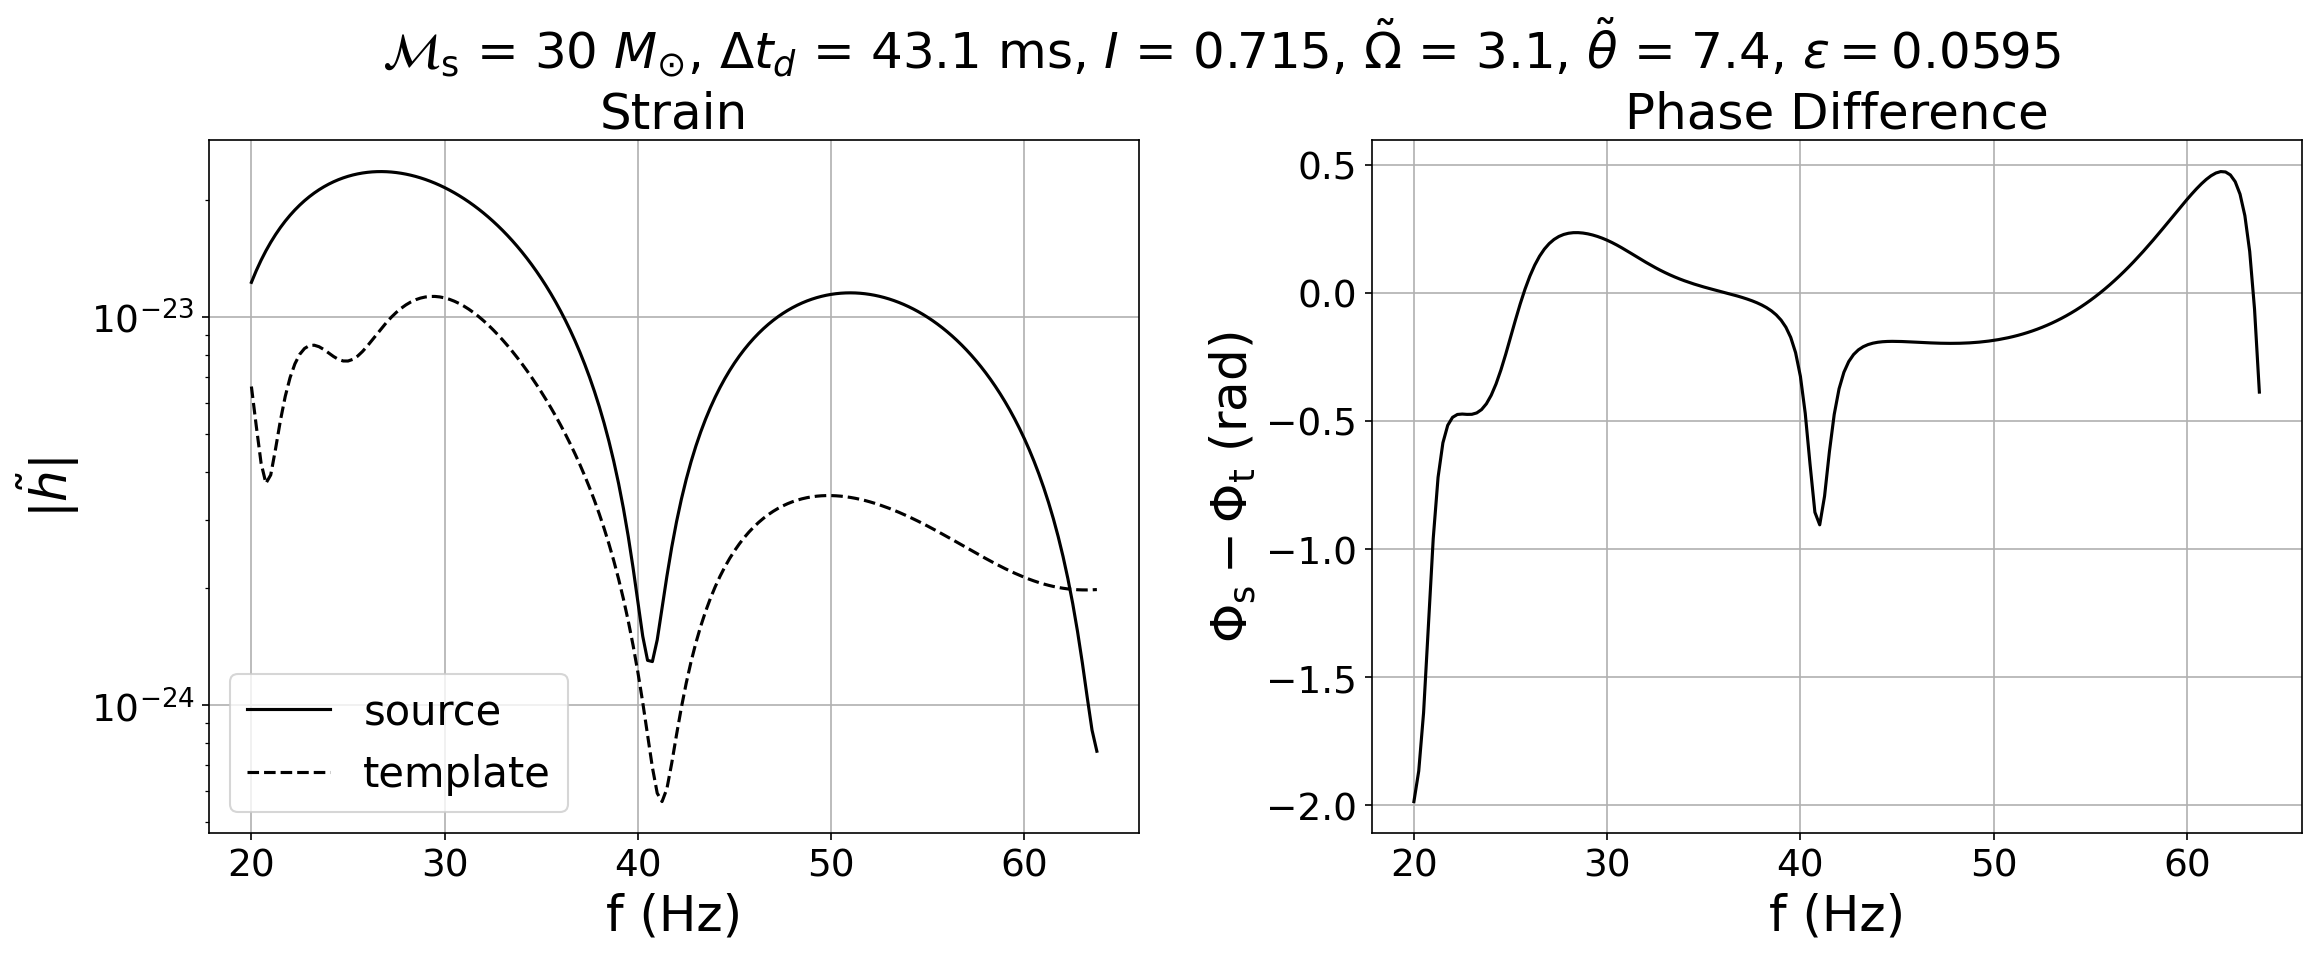

In [19]:
c = 18
data_I = data[td_arr[c]]
lens_params_2 = data["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

y_arr = data_I["y_arr"]
MLz_arr = data_I["MLz_arr"]

for i in range(0, len(y_arr), 10):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["y"] = y_arr[i]
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_I[I_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()